In [2]:
#Mark Kelley, Tina Letter, Bailey Sanden, Alyssa Stegner, Stephanie Brandebura, Leslie Aparcana
#HI 2020: Practical Statistics
#Project 2: Data Exploration in Python
#12/10/2021
import math
import pandas as pd


#############################################
##-----------------------------------------##
##------THE FOLLOWING CODE CREATES A-------##
##------DATAFRAME WITH THE APPROPRIATE-----## 
##------FEATURES TO ANALYZE THE------------## 
##------PREVELANCE OF OBESITY AMONG--------##
##------MEN AND WOMEN IN THE NORTHEAST-----##
##------AND SOUTH REGIONS OF AMERICA-------##
##-----------------------------------------##
#############################################


#------LOADING THE ENTIRE DATASET------#

datafile = pd.read_excel("BRFSS_BMI.xlsx", usecols = "A,B,G,H,J") #reading in the dataset and selecting the appropriate columns to use for the analysis
datafile = pd.DataFrame(datafile) #creating the overall dataframe that will be used to create the analysis dataframe using our own calculations
#print(datafile.shape) #52595 is correct (showing as 52594 since Python starts counting from zero)


#####################################
##---------------------------------##
##------OVERALL CATEGORY 2020------##
##---------------------------------##
#####################################


#------FILTERED BY THE YEAR 2020------#

year = [2020]
#is_2020 = datafile['Year']==2020 #this is another way to do the same thing
datafile_yr = datafile[datafile.Year.isin(year)]
#print(datafile_yr.shape) #5520 is correct - there are 104 rows per state * 53 states (= 5512) + 8 rows for "All States and DC (median)" (4) and "All States, DC, and Territories (median)" (4)


#------FILTERED BY THE STATES OF INTEREST (NE AND S REGIONS)------#

states = ["ME","NH","VT","MA","RI","CT","NY","NJ","PA","DE","MD","DC","VA","WV","KY","NC","TN","SC","GA","AL","FL","MS","LA","AR","OK","TX"]
datafile_yrst = datafile_yr[datafile_yr.Locationabbr.isin(states)]
#print(datafile_yrst.shape) #2704 is correct - there are 104 rows per state, limited to 26 states (104 * 26 = 2704)


#------FILTERED BY "OVERALL" BREAK OUT CATEGORY------#

gender = ["Overall"] #normally ["Male","Female","Overall"] 
datafile_yrstgd = datafile_yrst[datafile_yrst.Break_Out.isin(gender)]
#print(datafile_yrstgd.shape) #104 is correct for just the overall; every 4 rows summed is the total for each state when only using "overall"
#312 would be correct for male, female, and overall - we'd be limiting it to 12 rows per state (3 break out categories (male, female, overall) * 4 outcomes (underweight, normal, overweight, obese)) * 26 states (12 * 26 = 312)


#------PIVOTING THE DATASET TO HAVE EACH OVERALL VALUE LISTED WITH THE STATES AS COLUMNS------#

datafile_pivot = datafile_yrstgd.pivot(columns = ['Locationabbr'], values = 'Sample_Size')
#print("\nThis is the pivoted data file:")
#print(datafile_pivot)
#print(len(datafile_pivot.columns)) #this results in 26 columns, one for each state


#------CREATING A NEW DATAFRAME WITH THE OVERALL SAMPLE SIZES FOR EACH STATE------#

datafile_totals = datafile_pivot.sum()
datafile_totals = pd.DataFrame(datafile_totals)
datafile_totals.columns = ['Total_Sample_Size_2020']
#print("\nThis is the totals data frame:")
#print(datafile_totals)
#print(datafile_totals.shape)


#------FILTERED BY "OBESE" RESPONSE------# 

is_obese = datafile_yrstgd['Response'] == "Obese (BMI 30.0 - 99.8)"
datafile_yrstgdob = datafile_yrstgd[is_obese]
#print(datafile_yrstgdob.shape) #26 is correct - we are limiting it to 1 row per state (1 break out category (overall) * 1 response (obese)) * 26 states (1 * 26 = 26)
#print(datafile_yrstgdob)

#print(datafile_yrstgdob.index)
#print(datafile_totals.index)


#------ADDING THE OVERALL SAMPLE SIZE FOR EACH STATE TO FILTERED DATASET------#

datafile_totals = datafile_totals.set_index(datafile_yrstgdob.index) #making sure the indexes match for both dataframes (totals and yrstgdob; yr = year, st = state, gd = gender, ob = obese)

datafile_yrstgdob = datafile_yrstgdob.join(datafile_totals['Total_Sample_Size_2020']) #adding the overall sample size feature to the filtered dataset
datafile_yrstgdob = datafile_yrstgdob.astype({"Total_Sample_Size_2020": int}) #changing the overall sample size type to integer

datafile_yrstgdob["Obese_Overall_2020"] = ((datafile_yrstgdob["Sample_Size"] / datafile_yrstgdob["Total_Sample_Size_2020"])*100) #creating a new data value column with our own calculations
datafile_yrstgdob = datafile_yrstgdob.astype({"Obese_Overall_2020": float}) #changing the new data value type to float
datafile_yrstgdob.Obese_Overall_2020 = round(datafile_yrstgdob.Obese_Overall_2020,2) #rounding the new data value to two decimal places
#print(datafile_yrstgdob)


#------ADDING AND DEFINING A NEW FEATURE - "REGIONS"------#

ne_states = ["ME","NH","VT","MA","RI","CT","NY","NJ","PA"]

def is_ne(Locationabbr):
    return "Northeast" if Locationabbr in ne_states else "South"

datafile_yrstgdob['Region'] = datafile_yrstgdob['Locationabbr'].apply(is_ne)
#print(datafile_yrstgdob)

#------ADDING THE OVERALL 2020 FEATURES TO THE ANALYSIS DATAFRAME------#

datafile_analysis = datafile_yrstgdob['Locationabbr']
datafile_analysis = pd.DataFrame(datafile_analysis)

datafile_analysis = datafile_analysis.join(datafile_yrstgdob['Region'])
datafile_analysis = datafile_analysis.join(datafile_yrstgdob['Obese_Overall_2020'])
#print(datafile_analysis)


#st_states = ["DE","MD","DC","VA","WV","KY","NC","TN","SC","GA","AL","FL","MS","LA","AR","OK","TX"] #this is extra, but in case we need it


#####################################
##---------------------------------##
##------OVERALL CATEGORY 2011------##
##---------------------------------##
#####################################


#------FILTERED BY THE YEAR 2011------#

year = [2011]
#is_2011 = datafile['Year']==2011 #this is another way to do the same thing
datafile_yr = datafile[datafile.Year.isin(year)]
#print(datafile_yr.shape) #5520 is correct - there are 104 rows per state * 53 states (= 5512) + 8 rows for "All States and DC (median)" (4) and "All States, DC, and Territories (median)" (4)


#------FILTERED BY THE STATES OF INTEREST (NE AND S REGIONS)------#

states = ["ME","NH","VT","MA","RI","CT","NY","NJ","PA","DE","MD","DC","VA","WV","KY","NC","TN","SC","GA","AL","FL","MS","LA","AR","OK","TX"]
datafile_yrst = datafile_yr[datafile_yr.Locationabbr.isin(states)]
#print(datafile_yrst.shape) #2704 is correct - there are 104 rows per state, limited to 26 states (104 * 26 = 2704)


#------FILTERED BY "OVERALL" BREAK OUT CATEGORY------#

gender = ["Overall"] #normally ["Male","Female","Overall"] 
datafile_yrstgd = datafile_yrst[datafile_yrst.Break_Out.isin(gender)]
#print(datafile_yrstgd.shape) #104 is correct for just the overall; every 4 rows summed is the total for each state when only using "overall"
#312 would be correct for male, female, and overall - we'd be limiting it to 12 rows per state (3 break out categories (male, female, overall) * 4 outcomes (underweight, normal, overweight, obese)) * 26 states (12 * 26 = 312)


#------PIVOTING THE DATASET TO HAVE EACH OVERALL VALUE LISTED WITH THE STATES AS COLUMNS------#

datafile_pivot = datafile_yrstgd.pivot(columns = ['Locationabbr'], values = 'Sample_Size')
#print("\nThis is the pivoted data file:")
#print(datafile_pivot)
#print(len(datafile_pivot.columns)) #this results in 26 columns, one for each state


#------CREATING A NEW DATAFRAME WITH THE OVERALL SAMPLE SIZES FOR EACH STATE------#

datafile_totals = datafile_pivot.sum()
datafile_totals = pd.DataFrame(datafile_totals)
datafile_totals.columns = ['Total_Sample_Size_2011']
#print("\nThis is the totals data frame:")
#print(datafile_totals)
#print(datafile_totals.shape)


#------FILTERED BY "OBESE" RESPONSE------# 

is_obese = datafile_yrstgd['Response'] == "Obese (BMI 30.0 - 99.8)"
datafile_yrstgdob = datafile_yrstgd[is_obese]
#print(datafile_yrstgdob.shape) #26 is correct - we are limiting it to 1 row per state (1 break out category (overall) * 1 response (obese)) * 26 states (1 * 26 = 26)
#print(datafile_yrstgdob)

#print(datafile_yrstgdob.index)
#print(datafile_totals.index)


#------ADDING THE OVERALL SAMPLE SIZE FOR EACH STATE TO FILTERED DATASET------#

datafile_totals = datafile_totals.set_index(datafile_yrstgdob.index) #making sure the indexes match for both dataframes (totals and yrstgdob; yr = year, st = state, gd = gender, ob = obese)

datafile_yrstgdob = datafile_yrstgdob.join(datafile_totals['Total_Sample_Size_2011']) #adding the overall sample size feature to the filtered dataset
datafile_yrstgdob = datafile_yrstgdob.astype({"Total_Sample_Size_2011": int}) #changing the overall sample size type to integer
#print(datafile_yrstgdob)

datafile_yrstgdob["Obese_Overall_2011"] = ((datafile_yrstgdob["Sample_Size"] / datafile_yrstgdob["Total_Sample_Size_2011"])*100) #creating a new data value column with our own calculations
datafile_yrstgdob = datafile_yrstgdob.astype({"Obese_Overall_2011": float}) #changing the new data value type to float
datafile_yrstgdob.Obese_Overall_2011 = round(datafile_yrstgdob.Obese_Overall_2011,2) #rounding the new data value to two decimal places
#print(datafile_yrstgdob)


#------ADDING THE OVERALL 2011 FEATURES TO THE ANALYSIS DATAFRAME------#

datafile_yrstgdob = datafile_yrstgdob.set_index(datafile_analysis.index)
datafile_analysis = datafile_analysis.join(datafile_yrstgdob['Obese_Overall_2011'])

datafile_analysis['Overall_Change_2011_2020'] = (datafile_analysis['Obese_Overall_2020'] - datafile_analysis['Obese_Overall_2011'])
#print(datafile_analysis)


#####################################
##---------------------------------##
##-------MALE CATEGORY 2020--------##
##---------------------------------##
#####################################


#------FILTERED BY THE YEAR 2020------#

year = [2020]
#is_2020 = datafile['Year']==2020 #this is another way to do the same thing
datafile_yr = datafile[datafile.Year.isin(year)]
#print(datafile_yr.shape) #5520 is correct - there are 104 rows per state * 53 states (= 5512) + 8 rows for "All States and DC (median)" (4) and "All States, DC, and Territories (median)" (4)


#------FILTERED BY THE STATES OF INTEREST (NE AND S REGIONS)------#

states = ["ME","NH","VT","MA","RI","CT","NY","NJ","PA","DE","MD","DC","VA","WV","KY","NC","TN","SC","GA","AL","FL","MS","LA","AR","OK","TX"]
datafile_yrst = datafile_yr[datafile_yr.Locationabbr.isin(states)]
#print(datafile_yrst.shape) #2704 is correct - there are 104 rows per state, limited to 26 states (104 * 26 = 2704)


#------FILTERED BY "MALE" BREAK OUT CATEGORY------#

gender = ["Male"] #normally ["Male","Female","Overall"] 
datafile_yrstgd = datafile_yrst[datafile_yrst.Break_Out.isin(gender)]
#print(datafile_yrstgd.shape) #104 is correct for just the overall; every 4 rows summed is the total for each state when only using "overall"
#312 would be correct for male, female, and overall - we'd be limiting it to 12 rows per state (3 break out categories (male, female, overall) * 4 outcomes (underweight, normal, overweight, obese)) * 26 states (12 * 26 = 312)


#------PIVOTING THE DATASET TO HAVE EACH MALE VALUE LISTED WITH THE STATES AS COLUMNS------#

datafile_pivot = datafile_yrstgd.pivot(columns = ['Locationabbr'], values = 'Sample_Size')
#print("\nThis is the pivoted data file:")
#print(datafile_pivot)
#print(len(datafile_pivot.columns)) #this results in 26 columns, one for each state


#------CREATING A NEW DATAFRAME WITH THE MALE SAMPLE SIZES FOR EACH STATE------#

datafile_totals = datafile_pivot.sum()
datafile_totals = pd.DataFrame(datafile_totals)
datafile_totals.columns = ['Total_Males_2020']
#print("\nThis is the totals data frame:")
#print(datafile_totals)
#print(datafile_totals.shape)


#------FILTERED BY "OBESE" RESPONSE------# 

is_obese = datafile_yrstgd['Response'] == "Obese (BMI 30.0 - 99.8)"
datafile_yrstgdob = datafile_yrstgd[is_obese]
#print(datafile_yrstgdob.shape) #26 is correct - we are limiting it to 1 row per state (1 break out category (overall) * 1 response (obese)) * 26 states (1 * 26 = 26)
#print(datafile_yrstgdob)

#print(datafile_yrstgdob.index)
#print(datafile_totals.index)


#------ADDING THE MALES SAMPLE SIZE FOR EACH STATE TO FILTERED DATASET------#

datafile_totals = datafile_totals.set_index(datafile_yrstgdob.index) #making sure the indexes match for both dataframes (totals and yrstgdob; yr = year, st = state, gd = gender, ob = obese)

datafile_yrstgdob = datafile_yrstgdob.join(datafile_totals['Total_Males_2020']) #adding the overall sample size feature to the filtered dataset
datafile_yrstgdob = datafile_yrstgdob.astype({"Total_Males_2020": int}) #changing the overall sample size type to integer

datafile_yrstgdob["Obese_Males_2020"] = ((datafile_yrstgdob["Sample_Size"] / datafile_yrstgdob["Total_Males_2020"])*100) #creating a new data value column with our own calculations
datafile_yrstgdob = datafile_yrstgdob.astype({"Obese_Males_2020": float}) #changing the new data value type to float
datafile_yrstgdob.Obese_Males_2020 = round(datafile_yrstgdob.Obese_Males_2020,2) #rounding the new data value to two decimal places
#print(datafile_yrstgdob)


#------ADDING THE MALE 2020 FEATURES TO THE ANALYSIS DATAFRAME------#

datafile_yrstgdob = datafile_yrstgdob.set_index(datafile_analysis.index)
datafile_analysis = datafile_analysis.join(datafile_yrstgdob['Obese_Males_2020'])
#print(datafile_analysis)


#####################################
##---------------------------------##
##-------MALE CATEGORY 2011--------##
##---------------------------------##
#####################################


#------FILTERED BY THE YEAR 2011------#

year = [2011]
#is_2011 = datafile['Year']==2011 #this is another way to do the same thing
datafile_yr = datafile[datafile.Year.isin(year)]
#print(datafile_yr.shape) #5520 is correct - there are 104 rows per state * 53 states (= 5512) + 8 rows for "All States and DC (median)" (4) and "All States, DC, and Territories (median)" (4)


#------FILTERED BY THE STATES OF INTEREST (NE AND S REGIONS)------#

states = ["ME","NH","VT","MA","RI","CT","NY","NJ","PA","DE","MD","DC","VA","WV","KY","NC","TN","SC","GA","AL","FL","MS","LA","AR","OK","TX"]
datafile_yrst = datafile_yr[datafile_yr.Locationabbr.isin(states)]
#print(datafile_yrst.shape) #2704 is correct - there are 104 rows per state, limited to 26 states (104 * 26 = 2704)


#------FILTERED BY "MALE" BREAK OUT CATEGORY------#

gender = ["Male"] #normally ["Male","Female","Overall"] 
datafile_yrstgd = datafile_yrst[datafile_yrst.Break_Out.isin(gender)]
#print(datafile_yrstgd.shape) #104 is correct for just the overall; every 4 rows summed is the total for each state when only using "overall"
#312 would be correct for male, female, and overall - we'd be limiting it to 12 rows per state (3 break out categories (male, female, overall) * 4 outcomes (underweight, normal, overweight, obese)) * 26 states (12 * 26 = 312)


#------PIVOTING THE DATASET TO HAVE EACH MALE VALUE LISTED WITH THE STATES AS COLUMNS------#

datafile_pivot = datafile_yrstgd.pivot(columns = ['Locationabbr'], values = 'Sample_Size')
#print("\nThis is the pivoted data file:")
#print(datafile_pivot)
#print(len(datafile_pivot.columns)) #this results in 26 columns, one for each state


#------CREATING A NEW DATAFRAME WITH THE MALE SAMPLE SIZES FOR EACH STATE------#

datafile_totals = datafile_pivot.sum()
datafile_totals = pd.DataFrame(datafile_totals)
datafile_totals.columns = ['Total_Males_2011']
#print("\nThis is the totals data frame:")
#print(datafile_totals)
#print(datafile_totals.shape)


#------FILTERED BY "OBESE" RESPONSE------# 

is_obese = datafile_yrstgd['Response'] == "Obese (BMI 30.0 - 99.8)"
datafile_yrstgdob = datafile_yrstgd[is_obese]
#print(datafile_yrstgdob.shape) #26 is correct - we are limiting it to 1 row per state (1 break out category (overall) * 1 response (obese)) * 26 states (1 * 26 = 26)
#print(datafile_yrstgdob)

#print(datafile_yrstgdob.index)
#print(datafile_totals.index)


#------ADDING THE MALE SAMPLE SIZE FOR EACH STATE TO FILTERED DATASET------#

datafile_totals = datafile_totals.set_index(datafile_yrstgdob.index) #making sure the indexes match for both dataframes (totals and yrstgdob; yr = year, st = state, gd = gender, ob = obese)

datafile_yrstgdob = datafile_yrstgdob.join(datafile_totals['Total_Males_2011']) #adding the overall sample size feature to the filtered dataset
datafile_yrstgdob = datafile_yrstgdob.astype({"Total_Males_2011": int}) #changing the overall sample size type to integer
#print(datafile_yrstgdob)

datafile_yrstgdob["Obese_Males_2011"] = ((datafile_yrstgdob["Sample_Size"] / datafile_yrstgdob["Total_Males_2011"])*100) #creating a new data value column with our own calculations
datafile_yrstgdob = datafile_yrstgdob.astype({"Obese_Males_2011": float}) #changing the new data value type to float
datafile_yrstgdob.Obese_Males_2011 = round(datafile_yrstgdob.Obese_Males_2011,2) #rounding the new data value to two decimal places
#print(datafile_yrstgdob)


#------ADDING THE MALE 2011 FEATURES TO THE ANALYSIS DATAFRAME------#

datafile_yrstgdob = datafile_yrstgdob.set_index(datafile_analysis.index)
datafile_analysis = datafile_analysis.join(datafile_yrstgdob['Obese_Males_2011'])

datafile_analysis['Males_Change_2011_2020'] = (datafile_analysis['Obese_Males_2020'] - datafile_analysis['Obese_Males_2011'])
#print(datafile_analysis)


#####################################
##---------------------------------##
##-------FEMALE CATEGORY 2020------##
##---------------------------------##
#####################################


#------FILTERED BY THE YEAR 2020------#

year = [2020]
#is_2020 = datafile['Year']==2020 #this is another way to do the same thing
datafile_yr = datafile[datafile.Year.isin(year)]
#print(datafile_yr.shape) #5520 is correct - there are 104 rows per state * 53 states (= 5512) + 8 rows for "All States and DC (median)" (4) and "All States, DC, and Territories (median)" (4)


#------FILTERED BY THE STATES OF INTEREST (NE AND S REGIONS)------#

states = ["ME","NH","VT","MA","RI","CT","NY","NJ","PA","DE","MD","DC","VA","WV","KY","NC","TN","SC","GA","AL","FL","MS","LA","AR","OK","TX"]
datafile_yrst = datafile_yr[datafile_yr.Locationabbr.isin(states)]
#print(datafile_yrst.shape) #2704 is correct - there are 104 rows per state, limited to 26 states (104 * 26 = 2704)


#------FILTERED BY "FEMALE" BREAK OUT CATEGORY------#

gender = ["Female"] #normally ["Male","Female","Overall"] 
datafile_yrstgd = datafile_yrst[datafile_yrst.Break_Out.isin(gender)]
#print(datafile_yrstgd.shape) #104 is correct for just the overall; every 4 rows summed is the total for each state when only using "overall"
#312 would be correct for male, female, and overall - we'd be limiting it to 12 rows per state (3 break out categories (male, female, overall) * 4 outcomes (underweight, normal, overweight, obese)) * 26 states (12 * 26 = 312)


#------PIVOTING THE DATASET TO HAVE EACH FEMALE VALUE LISTED WITH THE STATES AS COLUMNS------#

datafile_pivot = datafile_yrstgd.pivot(columns = ['Locationabbr'], values = 'Sample_Size')
#print("\nThis is the pivoted data file:")
#print(datafile_pivot)
#print(len(datafile_pivot.columns)) #this results in 26 columns, one for each state


#------CREATING A NEW DATAFRAME WITH THE FEMALE SAMPLE SIZES FOR EACH STATE------#

datafile_totals = datafile_pivot.sum()
datafile_totals = pd.DataFrame(datafile_totals)
datafile_totals.columns = ['Total_Females_2020']
#print("\nThis is the totals data frame:")
#print(datafile_totals)
#print(datafile_totals.shape)


#------FILTERED BY "OBESE" RESPONSE------# 

is_obese = datafile_yrstgd['Response'] == "Obese (BMI 30.0 - 99.8)"
datafile_yrstgdob = datafile_yrstgd[is_obese]
#print(datafile_yrstgdob.shape) #26 is correct - we are limiting it to 1 row per state (1 break out category (overall) * 1 response (obese)) * 26 states (1 * 26 = 26)
#print(datafile_yrstgdob)

#print(datafile_yrstgdob.index)
#print(datafile_totals.index)


#------ADDING THE FEMALES SAMPLE SIZE FOR EACH STATE TO FILTERED DATASET------#

datafile_totals = datafile_totals.set_index(datafile_yrstgdob.index) #making sure the indexes match for both dataframes (totals and yrstgdob; yr = year, st = state, gd = gender, ob = obese)

datafile_yrstgdob = datafile_yrstgdob.join(datafile_totals['Total_Females_2020']) #adding the overall sample size feature to the filtered dataset
datafile_yrstgdob = datafile_yrstgdob.astype({"Total_Females_2020": int}) #changing the overall sample size type to integer

datafile_yrstgdob["Obese_Females_2020"] = ((datafile_yrstgdob["Sample_Size"] / datafile_yrstgdob["Total_Females_2020"])*100) #creating a new data value column with our own calculations
datafile_yrstgdob = datafile_yrstgdob.astype({"Obese_Females_2020": float}) #changing the new data value type to float
datafile_yrstgdob.Obese_Females_2020 = round(datafile_yrstgdob.Obese_Females_2020,2) #rounding the new data value to two decimal places
#print(datafile_yrstgdob)


#------ADDING THE OVERALL 2020 FEATURES TO THE ANALYSIS DATAFRAME------#

datafile_yrstgdob = datafile_yrstgdob.set_index(datafile_analysis.index)
datafile_analysis = datafile_analysis.join(datafile_yrstgdob['Obese_Females_2020'])
#print(datafile_analysis)


#####################################
##---------------------------------##
##-------FEMALE CATEGORY 2011------##
##---------------------------------##
#####################################


#------FILTERED BY THE YEAR 2011------#

year = [2011]
#is_2011 = datafile['Year']==2011 #this is another way to do the same thing
datafile_yr = datafile[datafile.Year.isin(year)]
#print(datafile_yr.shape) #5520 is correct - there are 104 rows per state * 53 states (= 5512) + 8 rows for "All States and DC (median)" (4) and "All States, DC, and Territories (median)" (4)


#------FILTERED BY THE STATES OF INTEREST (NE AND S REGIONS)------#

states = ["ME","NH","VT","MA","RI","CT","NY","NJ","PA","DE","MD","DC","VA","WV","KY","NC","TN","SC","GA","AL","FL","MS","LA","AR","OK","TX"]
datafile_yrst = datafile_yr[datafile_yr.Locationabbr.isin(states)]
#print(datafile_yrst.shape) #2704 is correct - there are 104 rows per state, limited to 26 states (104 * 26 = 2704)


#------FILTERED BY "FEMALE" BREAK OUT CATEGORY------#

gender = ["Female"] #normally ["Male","Female","Overall"] 
datafile_yrstgd = datafile_yrst[datafile_yrst.Break_Out.isin(gender)]
#print(datafile_yrstgd.shape) #104 is correct for just the overall; every 4 rows summed is the total for each state when only using "overall"
#312 would be correct for male, female, and overall - we'd be limiting it to 12 rows per state (3 break out categories (male, female, overall) * 4 outcomes (underweight, normal, overweight, obese)) * 26 states (12 * 26 = 312)


#------PIVOTING THE DATASET TO HAVE EACH FEMALE VALUE LISTED WITH THE STATES AS COLUMNS------#

datafile_pivot = datafile_yrstgd.pivot(columns = ['Locationabbr'], values = 'Sample_Size')
#print("\nThis is the pivoted data file:")
#print(datafile_pivot)
#print(len(datafile_pivot.columns)) #this results in 26 columns, one for each state


#------CREATING A NEW DATAFRAME WITH THE FEMALE SAMPLE SIZES FOR EACH STATE------#

datafile_totals = datafile_pivot.sum()
datafile_totals = pd.DataFrame(datafile_totals)
datafile_totals.columns = ['Total_Females_2011']
#print("\nThis is the totals data frame:")
#print(datafile_totals)
#print(datafile_totals.shape)


#------FILTERED BY "OBESE" RESPONSE------# 

is_obese = datafile_yrstgd['Response'] == "Obese (BMI 30.0 - 99.8)"
datafile_yrstgdob = datafile_yrstgd[is_obese]
#print(datafile_yrstgdob.shape) #26 is correct - we are limiting it to 1 row per state (1 break out category (overall) * 1 response (obese)) * 26 states (1 * 26 = 26)
#print(datafile_yrstgdob)

#print(datafile_yrstgdob.index)
#print(datafile_totals.index)


#------ADDING THE FEMALES SAMPLE SIZE FOR EACH STATE TO FILTERED DATASET------#

datafile_totals = datafile_totals.set_index(datafile_yrstgdob.index) #making sure the indexes match for both dataframes (totals and yrstgdob; yr = year, st = state, gd = gender, ob = obese)

datafile_yrstgdob = datafile_yrstgdob.join(datafile_totals['Total_Females_2011']) #adding the overall sample size feature to the filtered dataset
datafile_yrstgdob = datafile_yrstgdob.astype({"Total_Females_2011": int}) #changing the overall sample size type to integer
#print(datafile_yrstgdob)

datafile_yrstgdob["Obese_Females_2011"] = ((datafile_yrstgdob["Sample_Size"] / datafile_yrstgdob["Total_Females_2011"])*100) #creating a new data value column with our own calculations
datafile_yrstgdob = datafile_yrstgdob.astype({"Obese_Females_2011": float}) #changing the new data value type to float
datafile_yrstgdob.Obese_Females_2011 = round(datafile_yrstgdob.Obese_Females_2011,2) #rounding the new data value to two decimal places
#print(datafile_yrstgdob)


#------ADDING THE FEMALE 2011 FEATURES TO THE ANALYSIS DATAFRAME------#

datafile_yrstgdob = datafile_yrstgdob.set_index(datafile_analysis.index)
datafile_analysis = datafile_analysis.join(datafile_yrstgdob['Obese_Females_2011'])

datafile_analysis['Females_Change_2011_2020'] = (datafile_analysis['Obese_Females_2020'] - datafile_analysis['Obese_Females_2011'])
#print(datafile_analysis)


#------PRINT OUT A COMPLETION MESSAGE SO YOU CAN MOVE ON TO THE NEXT SECTION OF CODE------#

from IPython.display import Markdown as md

print('\033[1m' + 'THE ANALYSIS DATAFRAME HAS BEEN CREATED.' + '\033[0m')
md("*See below to continue*")

#####################################
##---------------------------------##
##-------THIS NOW COMPLETES--------## 
##------THE ANALYSIS DATASET-------##
##---------------------------------##
#####################################


print(datafile_analysis)

THE ANALYSIS DATAFRAME HAS BEEN CREATED.
      Locationabbr     Region  Obese_Overall_2020  Obese_Overall_2011  \
1925            AL      South               38.57               33.08   
2885            AR      South               35.09               30.59   
6915            CT  Northeast               29.56               24.76   
7857            DC      South               23.48               23.74   
8865            DE      South               35.88               29.89   
9877            FL      South               30.84               27.47   
10823           GA      South               34.96               29.20   
18768           KY      South               37.19               32.43   
19779           LA      South               36.30               34.35   
20727           MA  Northeast               24.20               24.55   
21779           MD      South               31.89               28.00   
22778           ME  Northeast               30.17               27.26   
26723     

In [3]:
#Mark Kelley, Tina Letter, Bailey Sanden, Alyssa Stegner, Stephanie Brandebura, Leslie Aparcana
#HI 2020: Practical Statistics
#Project 2: Data Exploration in Python
#12/10/2021

##############################################################
#------------------------------------------------------------#
#------THE FOLLOWING CODE CONDUCTS THE EXPLORATORY AND-------#
#----AND DESCRIPTIVE STATISTICS OF THE ANALYSIS DATAFRAME----# 
#------------------------------------------------------------#
##############################################################


from scipy import stats

#------For each of the following statistical tests, the analysis dataframe was first---------------#
#------filtered to either include the northeast, south, or both regions. Once that was-------------#
#------complete, the data was either run or filtered further to only contain obese males-----------#
#------or females or both in 2011 or 2020. Finally, that data was run in the stats package---------# 
#------using 't.test'.-----------------------------------------------------------------------------#


#Obese 2011 V Obese 2020
#Comparing the % of obese people on the East Coast in 2011 vs % of obese people on the East Coast in 2020
df = datafile_analysis
df_2011_obese = df.filter(items=['Obese_Overall_2011'])
df_2020_obese = df.filter(items=['Obese_Overall_2020'])
ttest_obese_2011_2020 = stats.ttest_ind(df_2011_obese,df_2020_obese)
print("\nHYPOTHESIS #1")
print("The t-test result for obese people in 2011 vs obese people in 2020 along the East Coast is:")
#print(ttest_obese_2011_2020)
print("T-statistic = %.8f" % ttest_obese_2011_2020.statistic," and p-value = %.8f" % (ttest_obese_2011_2020.pvalue/2))
print("Null Hypothesis: Population in 2011 was NOT LESS obese than population in 2020")
print("Since the p-value is < 0.05 and the T-statistic is negative, we REJECT the null hypothesis and claim the population in 2011 was LESS obese than the population in 2020")

mean1 = float(df_2020_obese.mean())
#print("mean1 = ",mean1)
mean2 = float(df_2011_obese.mean())
#print("mean2 = ",mean2)
diff_means = mean1 - mean2
#print("diff in means = ",diff_means)
std1 = float(df_2020_obese.std())
#print("std1 = ",std1)
std2 = float(df_2011_obese.std())
#print("std2 = ",std2)
N1 = 26
#print("N1 = ",N1)
N2 = 26
#print("N2 = ",N2)
var1 = pow(std1,2)/N1
var2 = pow(std2,2)/N2
#print("std1^2 = ",pow(std1,2))
#print("std1^2 / N1 = ",var1)
#print("std2^2 = ",pow(std2,2))
#print("std2^2 / N2 = ",var2)

confint_low = diff_means-1.96*math.sqrt(var1+var2)
confint_high = diff_means+1.96*math.sqrt(var1+var2)
confint = 1.96*math.sqrt(var1+var2)
print("95 CI = %.3f" % diff_means,"+/- %.3f" % confint," OR [%.3f" % confint_low,", %.3f" % confint_high,"]")
print("Meaning we are 95% confident the difference in means falls between "+str(round(confint_low,3))+" and "+str(round(confint_high,3))+"% more obese")


##################################################################################################################


#Obese NE 2011 V NE 2020
#Comparing the % of obese people in the northeast 2011 vs % of obese people in the northeast 2020
df = datafile_analysis
df_northeast = df[(df.Region == "Northeast")]
df_northeast_obese_2011 = df_northeast.filter(items=['Obese_Overall_2011'])
df_northeast_obese_2020 = df_northeast.filter(items=['Obese_Overall_2020'])
ttest_northeast_2011_2020= stats.ttest_ind(df_northeast_obese_2011, df_northeast_obese_2020)
print("\nHYPOTHESIS #2")
print("The t-test result for obese people in the northeast in 2011 vs obese people in the northeast in 2020 is:")
#print(ttest_northeast_2011_2020)
print("T-statistic = %.8f" % ttest_northeast_2011_2020.statistic," and p-value = %.8f" % (ttest_northeast_2011_2020.pvalue/2))
print("Null Hypothesis: Population in the Northeast in 2011 was NOT LESS obese than population in the Northeast in 2020")
print("Since the p-value is < 0.05 and the T-statistic is negative, we REJECT the null hypothesis and claim the population in 2011 was LESS obese than the population in 2020")

mean1 = float(df_northeast_obese_2020.mean())
#print("mean1 = ",mean1)
mean2 = float(df_northeast_obese_2011.mean())
#print("mean2 = ",mean2)
diff_means = mean1 - mean2
#print("diff in means = ",diff_means)
std1 = float(df_northeast_obese_2020.std())
#print("std1 = ",std1)
std2 = float(df_northeast_obese_2011.std())
#print("std2 = ",std2)
N1 = 9
#print("N1 = ",N1)
N2 = 9
#print("N2 = ",N2)
var1 = pow(std1,2)/N1
var2 = pow(std2,2)/N2
#print("std1^2 = ",pow(std1,2))
#print("std1^2 / N1 = ",var1)
#print("std2^2 = ",pow(std2,2))
#print("std2^2 / N2 = ",var2)

confint_low = diff_means-1.96*math.sqrt(var1+var2)
confint_high = diff_means+1.96*math.sqrt(var1+var2)
confint = 1.96*math.sqrt(var1+var2)
print("95 CI = %.3f" % diff_means,"+/- %.3f" % confint," OR [%.3f" % confint_low,", %.3f" % confint_high,"]")
print("Meaning we are 95% confident the difference in means falls between "+str(round(confint_low,3))+" and "+str(round(confint_high,3))+"% more obese")


##################################################################################################################


#Obese S 2011 V S 2020
#Comparing the % of obese people in the south 2011 vs % of obese people in the south 2020
df = datafile_analysis
df_south = df[(df.Region == "South")]
df_south_obese_2011 = df_south.filter(items=['Obese_Overall_2011'])
df_south_obese_2020 = df_south.filter(items=['Obese_Overall_2020'])
ttest_south_2011_2020= stats.ttest_ind(df_south_obese_2011, df_south_obese_2020)
print("\nHYPOTHESIS #3")
print("The t-test result for obese people in the south in 2011 vs obese people in the south in 2020 is:")
#print(ttest_south_2011_2020)
print("T-statistic = %.8f" % ttest_south_2011_2020.statistic," and p-value = %.8f" % (ttest_south_2011_2020.pvalue/2))
print("Null Hypothesis: Population in the South in 2011 was NOT LESS obese than population in the South in 2020")
print("Since the p-value is < 0.05 and the T-statistic is negative, we REJECT the null hypothesis and claim the population in 2011 was LESS obese than the population in 2020")

mean1 = float(df_south_obese_2020.mean())
#print("mean1 = ",mean1)
mean2 = float(df_south_obese_2011.mean())
#print("mean2 = ",mean2)
diff_means = mean1 - mean2
#print("diff in means = ",diff_means)
std1 = float(df_south_obese_2020.std())
#print("std1 = ",std1)
std2 = float(df_south_obese_2011.std())
#print("std2 = ",std2)
N1 = 17
#print("N1 = ",N1)
N2 = 17
#print("N2 = ",N2)
var1 = pow(std1,2)/N1
var2 = pow(std2,2)/N2
#print("std1^2 = ",pow(std1,2))
#print("std1^2 / N1 = ",var1)
#print("std2^2 = ",pow(std2,2))
#print("std2^2 / N2 = ",var2)

confint_low = diff_means-1.96*math.sqrt(var1+var2)
confint_high = diff_means+1.96*math.sqrt(var1+var2)
confint = 1.96*math.sqrt(var1+var2)
print("95 CI = %.3f" % diff_means,"+/- %.3f" % confint," OR [%.3f" % confint_low,", %.3f" % confint_high,"]")
print("Meaning we are 95% confident the difference in means falls between "+str(round(confint_low,3))+" and "+str(round(confint_high,3))+"% more obese")


##################################################################################################################


#Obese S 2011 V NE 2011
#Population in the South in 2011 is not more obese than population in the Northeast in 2011 
df = datafile_analysis
df_south = df[(df.Region == "South")]
df_northeast = df[(df.Region == "Northeast")]
df_northeast_obese_2011 = df_northeast.filter(items=['Obese_Overall_2011'])
df_south_obese_2011 = df_south.filter(items=['Obese_Overall_2011'])
ttest_overall_2011= stats.ttest_ind(df_south_obese_2011,df_northeast_obese_2011)
print("\nHYPOTHESIS #4")
print("The t-test result for obese people in the South in 2011 vs obese people in the Northeast in 2011 is:")
print("T-statistic = %.8f" % ttest_overall_2011.statistic," and p-value = %.8f" % (ttest_overall_2011.pvalue/2))
print("Null Hypothesis: Population in the South in 2011 was NOT MORE obese than population in the Northeast in 2011")
print("Since the p-value is < 0.05 and the T-statistic is positive, we REJECT the null hypothesis and claim the population in the South in 2011 was MORE obese than the population in the Northeast in 2011")

mean1 = float(df_south_obese_2011.mean())
#print("mean1 = ",mean1)
mean2 = float(df_northeast_obese_2011.mean())
#print("mean2 = ",mean2)
diff_means = mean1 - mean2
#print("diff in means = ",diff_means)
std1 = float(df_south_obese_2011.std())
#print("std1 = ",std1)
std2 = float(df_northeast_obese_2011.std())
#print("std2 = ",std2)
N1 = 17
#print("N1 = ",N1)
N2 = 9
#print("N2 = ",N2)
var1 = pow(std1,2)/N1
var2 = pow(std2,2)/N2
#print("std1^2 = ",pow(std1,2))
#print("std1^2 / N1 = ",var1)
#print("std2^2 = ",pow(std2,2))
#print("std2^2 / N2 = ",var2)

confint_low = diff_means-1.96*math.sqrt(var1+var2)
confint_high = diff_means+1.96*math.sqrt(var1+var2)
confint = 1.96*math.sqrt(var1+var2)
print("95 CI = %.3f" % diff_means,"+/- %.3f" % confint," OR [%.3f" % confint_low,", %.3f" % confint_high,"]")
print("Meaning we are 95% confident the difference in means falls between "+str(round(confint_low,3))+" and "+str(round(confint_high,3))+"% more obese")


##################################################################################################################


#Obese S 2020 V NE 2020
#Population in the South in 2020 is not more obese than population in the Northeast in 2020 
df = datafile_analysis
df_south = df[(df.Region == "South")]
df_northeast = df[(df.Region == "Northeast")]
df_south_obese_2020 = df_south.filter(items=['Obese_Overall_2020'])
df_northeast_obese_2020 = df_northeast.filter(items=['Obese_Overall_2020'])
ttest_overall_2020= stats.ttest_ind(df_south_obese_2020,df_northeast_obese_2020)
print("\nHYPOTHESIS #5")
print("The t-test result for obese people in the South in 2020 vs obese people in the Northeast in 2020 is:")
print("T-statistic = %.8f" % ttest_overall_2020.statistic," and p-value = %.8f" % (ttest_overall_2020.pvalue/2))
print("Null Hypothesis: Population in the South in 2020 was NOT MORE obese than population in the Northeast in 2011")
print("Since the p-value is < 0.05 and the T-statistic is positive, we REJECT the null hypothesis and claim the population in the South in 2020 was MORE obese than the population in the Northeast in 2020")

mean1 = float(df_south_obese_2020.mean())
#print("mean1 = ",mean1)
mean2 = float(df_northeast_obese_2020.mean())
#print("mean2 = ",mean2)
diff_means = mean1 - mean2
#print("diff in means = ",diff_means)
std1 = float(df_south_obese_2020.std())
#print("std1 = ",std1)
std2 = float(df_northeast_obese_2020.std())
#print("std2 = ",std2)
N1 = 17
#print("N1 = ",N1)
N2 = 9
#print("N2 = ",N2)
var1 = pow(std1,2)/N1
var2 = pow(std2,2)/N2
#print("std1^2 = ",pow(std1,2))
#print("std1^2 / N1 = ",var1)
#print("std2^2 = ",pow(std2,2))
#print("std2^2 / N2 = ",var2)

confint_low = diff_means-1.96*math.sqrt(var1+var2)
confint_high = diff_means+1.96*math.sqrt(var1+var2)
confint = 1.96*math.sqrt(var1+var2)
print("95 CI = %.3f" % diff_means,"+/- %.3f" % confint," OR [%.3f" % confint_low,", %.3f" % confint_high,"]")
print("Meaning we are 95% confident the difference in means falls between "+str(round(confint_low,3))+" and "+str(round(confint_high,3))+"% more obese")


##################################################################################################################


#Male V Female 2011 obese NE
#Comparing the % of males who are obese vs % of females who are obese in the northeast 2011
df = datafile_analysis
df_northeast = df[(df.Region == "Northeast")]
df_northeast_obese_m_2011 = df_northeast.filter(items=['Obese_Males_2011'])
df_northeast_obese_f_2011 = df_northeast.filter(items=['Obese_Females_2011'])
ttest_northeast_2011 = stats.ttest_ind(df_northeast_obese_f_2011,df_northeast_obese_m_2011)
print("\nHYPOTHESIS #6")
print("The t-test result for obese females in the northeast vs obese males in the northeast in 2011 is:")
#print(ttest_northeast_2011)
print("T-statistic = %.8f" % ttest_northeast_2011.statistic," and p-value = %.8f" % (ttest_northeast_2011.pvalue/2))
print("Null Hypothesis: Females in the Northeast in 2011 were NOT MORE obese than males in the Northeast in 2011")
print("Since the p-value is < 0.05 BUT the T-statistic is negative, we still REJECT the null hypothesis but claim that MALES in the NE in 2011 were MORE obese than females in the NE 2011")

mean1 = float(df_northeast_obese_f_2011.mean())
#print("mean1 = ",mean1)
mean2 = float(df_northeast_obese_m_2011.mean())
#print("mean2 = ",mean2)
diff_means = mean1 - mean2
#print("diff in means = ",diff_means)
std1 = float(df_northeast_obese_f_2011.std())
#print("std1 = ",std1)
std2 = float(df_northeast_obese_m_2011.std())
#print("std2 = ",std2)
N1 = 9
#print("N1 = ",N1)
N2 = 9
#print("N2 = ",N2)
var1 = pow(std1,2)/N1
var2 = pow(std2,2)/N2
#print("std1^2 = ",pow(std1,2))
#print("std1^2 / N1 = ",var1)
#print("std2^2 = ",pow(std2,2))
#print("std2^2 / N2 = ",var2)

confint_low = diff_means-1.96*math.sqrt(var1+var2)
confint_high = diff_means+1.96*math.sqrt(var1+var2)
confint = 1.96*math.sqrt(var1+var2)
print("95 CI = %.3f" % diff_means,"+/- %.3f" % confint," OR [%.3f" % confint_low,", %.3f" % confint_high,"]")
print("Meaning we are 95% confident the difference in means falls between "+str(round(confint_low,3))+" and "+str(round(confint_high,3))+"% more obese")


##################################################################################################################


#Male V Female 2020 obese NE
#Comparing the % of males who are obese vs % of females who are obese in the northeast 2020
df = datafile_analysis
#print(df.columns)
df_northeast = df[(df.Region == "Northeast")]
df_northeast_obese_m_2020 = df_northeast.filter(items=['Obese_Males_2020'])
df_northeast_obese_f_2020 = df_northeast.filter(items=['Obese_Females_2020'])
ttest_northeast_2020 = stats.ttest_ind(df_northeast_obese_f_2020,df_northeast_obese_m_2020)
print("\nHYPOTHESIS #7")
print("The t-test result for obese males in the northeast vs obese females in the northeast in 2020 is:")
#print(ttest_northeast_2020)
print("T-statistic = %.8f" % ttest_northeast_2020.statistic," and p-value = %.8f" % (ttest_northeast_2020.pvalue/2))
print("Null Hypothesis: Females in the Northeast in 2020 were NOT MORE obese than males in the Northeast in 2020")
print("Since the p-value is NOT < 0.05, we must ACCEPT the null hypothesis and claim that females in the NE in 2020 were NOT MORE obese than mmales in the NE 2020")

mean1 = float(df_northeast_obese_f_2020.mean())
#print("mean1 = ",mean1)
mean2 = float(df_northeast_obese_m_2020.mean())
#print("mean2 = ",mean2)
diff_means = mean1 - mean2
#print("diff in means = ",diff_means)
std1 = float(df_northeast_obese_f_2020.std())
#print("std1 = ",std1)
std2 = float(df_northeast_obese_m_2020.std())
#print("std2 = ",std2)
N1 = 9
#print("N1 = ",N1)
N2 = 9
#print("N2 = ",N2)
var1 = pow(std1,2)/N1
var2 = pow(std2,2)/N2
#print("std1^2 = ",pow(std1,2))
#print("std1^2 / N1 = ",var1)
#print("std2^2 = ",pow(std2,2))
#print("std2^2 / N2 = ",var2)

confint_low = diff_means-1.96*math.sqrt(var1+var2)
confint_high = diff_means+1.96*math.sqrt(var1+var2)
confint = 1.96*math.sqrt(var1+var2)
print("95 CI = %.3f" % diff_means,"+/- %.3f" % confint," OR [%.3f" % confint_low,", %.3f" % confint_high,"]")
print("Meaning we are 95% confident the difference in means falls between "+str(round(confint_low,3))+" and "+str(round(confint_high,3))+"% more obese")


##################################################################################################################


#Male V Female 2011 obese South 
#Comparing the % of males who are obese vs % of females who are obese in the south 2011
df = datafile_analysis
df_south = df[(df.Region == "South")]
df_south_obese_m_2011 = df_south.filter(items=['Obese_Males_2011'])
df_south_obese_f_2011 = df_south.filter(items=['Obese_Females_2011'])
ttest_south_2011 = stats.ttest_ind(df_south_obese_f_2011,df_south_obese_m_2011)
print("\nHYPOTHESIS #8")
print("The t-test result for obese females in the south vs obese males in the south in 2011 is:")
#print(ttest_south_2011)
print("T-statistic = %.8f" % ttest_south_2011.statistic," and p-value = %.8f" % (ttest_south_2011.pvalue/2))
print("Null Hypothesis: Females in the South in 2011 were NOT MORE obese than males in the South in 2011")
print("Since the p-value is NOT < 0.05 and the T-statistic is positive, we must ACCEPT the null hypothesis and claim that females in the south in 2011 were NOT MORE obese than males in the south in 2011")

mean1 = float(df_south_obese_f_2011.mean())
#print("mean1 = ",mean1)
mean2 = float(df_south_obese_m_2011.mean())
#print("mean2 = ",mean2)
diff_means = mean1 - mean2
#print("diff in means = ",diff_means)
std1 = float(df_south_obese_f_2011.std())
#print("std1 = ",std1)
std2 = float(df_south_obese_m_2011.std())
#print("std2 = ",std2)
N1 = 17
#print("N1 = ",N1)
N2 = 17
#print("N2 = ",N2)
var1 = pow(std1,2)/N1
var2 = pow(std2,2)/N2
#print("std1^2 = ",pow(std1,2))
#print("std1^2 / N1 = ",var1)
#print("std2^2 = ",pow(std2,2))
#print("std2^2 / N2 = ",var2)

confint_low = diff_means-1.96*math.sqrt(var1+var2)
confint_high = diff_means+1.96*math.sqrt(var1+var2)
confint = 1.96*math.sqrt(var1+var2)
print("95 CI = %.3f" % diff_means,"+/- %.3f" % confint," OR [%.3f" % confint_low,", %.3f" % confint_high,"]")
print("Meaning we are 95% confident the difference in means falls between "+str(round(confint_low,3))+" and "+str(round(confint_high,3))+"% more obese")


##################################################################################################################


#Male V Female 2020 obese South
#Comparing the % of males who are obese vs % of females who are obese in the south 2020
df = datafile_analysis
df_south = df[(df.Region == "South")]
df_south_obese_m_2020 = df_south.filter(items=['Obese_Males_2020'])
df_south_obese_f_2020 = df_south.filter(items=['Obese_Females_2020'])
ttest_south_2020 = stats.ttest_ind(df_south_obese_f_2020,df_south_obese_m_2020)
print("\nHYPOTHESIS #9")
print("The t-test result for obese females in the south vs obese males in the south in 2020 is:")
#print(ttest_south_2020)
print("T-statistic = %.8f" % ttest_south_2020.statistic," and p-value = %.8f" % (ttest_south_2020.pvalue/2))
print("Null Hypothesis: Females in the South in 2020 were NOT MORE obese than males in the South in 2020")
print("Since the p-value is NOT < 0.05 and the T-statistic is positive, we must ACCEPT the null hypothesis and claim that females in the south in 2020 were NOT MORE obese than males in the south in 2020")

mean1 = float(df_south_obese_f_2020.mean())
#print("mean1 = ",mean1)
mean2 = float(df_south_obese_m_2020.mean())
#print("mean2 = ",mean2)
diff_means = mean1 - mean2
#print("diff in means = ",diff_means)
std1 = float(df_south_obese_f_2020.std())
#print("std1 = ",std1)
std2 = float(df_south_obese_m_2020.std())
#print("std2 = ",std2)
N1 = 17
#print("N1 = ",N1)
N2 = 17
#print("N2 = ",N2)
var1 = pow(std1,2)/N1
var2 = pow(std2,2)/N2
#print("std1^2 = ",pow(std1,2))
#print("std1^2 / N1 = ",var1)
#print("std2^2 = ",pow(std2,2))
#print("std2^2 / N2 = ",var2)

confint_low = diff_means-1.96*math.sqrt(var1+var2)
confint_high = diff_means+1.96*math.sqrt(var1+var2)
confint = 1.96*math.sqrt(var1+var2)
print("95 CI = %.3f" % diff_means,"+/- %.3f" % confint," OR [%.3f" % confint_low,", %.3f" % confint_high,"]")
print("Meaning we are 95% confident the difference in means falls between "+str(round(confint_low,3))+" and "+str(round(confint_high,3))+"% more obese")


##################################################################################################################

#------Additional tests not used in the overall analysis------#


#Female NE V Female S 2020
#Comparing the % of obese female in the northest vs % of obese female in the south, 2020 
df = datafile_analysis
df_south = df[(df.Region == "South")]
df_south_obese_f_2020 = df_south.filter(items=['Obese_Females_2020'])

df_northeast= df[(df.Region=="Northeast")]
df_ne_obese_f_2020 = df_northeast.filter(items=['Obese_Females_2020'])
ttest_f_s_ne_2020 = stats.ttest_ind(df_south_obese_f_2020, df_ne_obese_f_2020)
#print("\nThe t-test result for obese females in the northeast vs obese females in the south in 2020 is:")
#print(ttest_f_s_ne_2020)
#print("T-statistic = %.8f" % ttest_f_s_ne_2020.statistic," and p-value = %.8f" % (ttest_f_s_ne_2020.pvalue/2))


#Female NE V Female S 2011
#Comparing the % of obese female in the northest vs % of obese female in the south, 2011
df = datafile_analysis
df_south = df[(df.Region == "South")]
df_south_obese_f_2011 = df_south.filter(items=['Obese_Females_2011'])

df_northeast= df[(df.Region=="Northeast")]
df_ne_obese_f_2011 = df_northeast.filter(items=['Obese_Females_2011'])
ttest_f_s_ne_2011 = stats.ttest_ind(df_south_obese_f_2011, df_ne_obese_f_2011)
#print("\nThe t-test result for obese females in the northeast vs obese females in the south in 2011 is:")
#print(ttest_f_s_ne_2011)
#print("T-statistic = %.8f" % ttest_f_s_ne_2011.statistic," and p-value = %.8f" % (ttest_f_s_ne_2011.pvalue/2))

#Male NE V Male S 2020
#Comparing the % of obese males in the northest vs % of obese males in the south, 2020 
df = datafile_analysis
df_south = df[(df.Region == "South")]
df_south_obese_m_2020 = df_south.filter(items=['Obese_Males_2020'])

df_northeast= df[(df.Region=="Northeast")]
df_ne_obese_m_2020 = df_northeast.filter(items=['Obese_Males_2020'])
ttest_m_s_ne_2020 = stats.ttest_ind(df_south_obese_m_2020, df_ne_obese_m_2020)
#print("\nThe t-test result for obese males in the northeast vs obese males in the south in 2020 is:")
#print(ttest_m_s_ne_2020)
#print("T-statistic = %.8f" % ttest_m_s_ne_2020.statistic," and p-value = %.8f" % (ttest_m_s_ne_2020.pvalue/2))


#Male NE V Male S 2011
#Comparing the % of obese males in the northest vs % of obese males in the south, 2011 
df = datafile_analysis
df_south = df[(df.Region == "South")]
df_south_obese_m_2011 = df_south.filter(items=['Obese_Males_2011'])

df_northeast= df[(df.Region=="Northeast")]
df_ne_obese_m_2011 = df_northeast.filter(items=['Obese_Males_2011'])
ttest_m_s_ne_2011 = stats.ttest_ind(df_south_obese_m_2011, df_ne_obese_m_2011)
#print("\nThe t-test result for obese males in the northeast vs obese males in the south in 2011 is:")
#print(ttest_m_s_ne_2011)
#print("T-statistic = %.8f" % ttest_m_s_ne_2011.statistic," and p-value = %.8f" % (ttest_m_s_ne_2011.pvalue/2))





# descriptive statistics
# Mean
print("\n\nDescriptive Stats - Both Regions (Mean)")
all_region = df.mean()
print(all_region)
print("\n\nDescriptive Stats - South (Mean)")
south_region = df_south.mean()
print(south_region)
print("\n\nDescriptive Stats - Northeast (Mean)")
northeast_region = df_northeast.mean()
print(northeast_region)

#Median
print("\n\nDescriptive Stats - Both Regions (Median)")
all_region_median = df.median()
print(all_region_median)
print("\n\nDescriptive Stats - South (Median)")
south_region_median = df_south.median()
print(south_region_median)
print("\n\nDescriptive Stats - Northeast (Median)")
northeast_region_median = df_northeast.median()
print(northeast_region_median)

#Min
print("\n\nDescriptive Stats - Both Regions (Min)")
all_region_min = df.min()
print(all_region_min)
print("\n\nDescriptive Stats - South (Min)")
south_region_min = df_south.min()
print(south_region_min)
print("\n\nDescriptive Stats - Northeast (Min)")
northeast_region_min = df_northeast.min()
print(northeast_region_min)

#Max 
print("\n\nDescriptive Stats - Both Regions (Max)")
all_region_max = df.max()
print(all_region_max)
print("\n\nDescriptive Stats - South (Max)")
south_region_max = df_south.max()
print(south_region_max)
print("\n\nDescriptive Stats - Northeast (Max)")
northeast_region_max = df_northeast.max()
print(northeast_region_max)

#st.d
print("\n\nDescriptive Stats - Both Regions (St.Dev)")
all_region_std = df.std()
print(all_region_std)
print("\n\nDescriptive Stats - South (St.Dev)")
south_region_std = df_south.std()
print(south_region_std)
print("\n\nDescriptive Stats - Northeast (St.dev)")
northeast_region_std = df_northeast.std()
print(northeast_region_std)

#confidence_interval = stats.t.interval(confidence_level (0.95), degrees_freedom, sample_mean (all_region), sample_standard_error)



HYPOTHESIS #1
The t-test result for obese people in 2011 vs obese people in 2020 along the East Coast is:
T-statistic = -3.56823886  and p-value = 0.00040200
Null Hypothesis: Population in 2011 was NOT LESS obese than population in 2020
Since the p-value is < 0.05 and the T-statistic is negative, we REJECT the null hypothesis and claim the population in 2011 was LESS obese than the population in 2020
95 CI = 3.957 +/- 2.174  OR [1.783 , 6.130 ]
Meaning we are 95% confident the difference in means falls between 1.783 and 6.13% more obese

HYPOTHESIS #2
The t-test result for obese people in the northeast in 2011 vs obese people in the northeast in 2020 is:
T-statistic = -3.07651684  and p-value = 0.00361330
Null Hypothesis: Population in the Northeast in 2011 was NOT LESS obese than population in the Northeast in 2020
Since the p-value is < 0.05 and the T-statistic is negative, we REJECT the null hypothesis and claim the population in 2011 was LESS obese than the population in 2020
95 C

In [140]:
#I will try a different graph tomorrow to better represent the overall change in obesity from 2011 to 2020 for Females but this is what I have so far 
# waterfall chart
#import waterfall_chart
#import matplotlib.pyplot as plt
#df = datafile_analysis
# print(df.columns)
# print(df['Females_Change_2011_2020'], df['Locationabbr'])
#waterfall_chart.plot(df['Locationabbr'], df['Females_Change_2011_2020'])

In [141]:
#This has not worked to create a map of NE/S Males so ignore.. I'll keep trying new ways 
# from bokeh.io import output_notebook, show, output_file
# from bokeh.plotting import figure
# from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
# from bokeh.palettes import brewer
# import json


# df = datafile_analysis
# print(df.columns)
# df_northeast_south = df[(df.Region == "Northeast") | (df.Region == "South")]
# print(df_northeast_south)
# merged_json = json.loads(df_northeast_south.to_json())
# json_data = json.dumps(merged_json)
# print(json_data)

# #Input GeoJSON source that contains features for plotting.
# geosource = GeoJSONDataSource(geojson = json_data)

# #Define a sequential multi-hue color palette.
# palette = brewer['YlGnBu'][8]

# #Reverse color order so that dark blue is highest obesity.
# palette = palette[::-1]

# #Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
# color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40)

# #Define custom tick labels for color bar.
# tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}#Create color bar. 
# color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
# border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)#Create figure object.
# p = figure(title = 'Share of males who are obese, 2020', plot_height = 600 , plot_width = 950, toolbar_location = None)
# p.xgrid.grid_line_color = None
# p.ygrid.grid_line_color = None

# #Add patch renderer to figure. 
# p.patches('xs','ys', source = geosource,fill_color = {'field' :'Obese_Males_2020', 'transform' : color_mapper},
#           line_color = 'black', line_width = 0.25, fill_alpha = 1)

# #Specify figure layout.
# p.add_layout(color_bar, 'below')
# output_notebook()
# show(p)

In [4]:
# load packages we will be using for this lesson
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(12,8)})

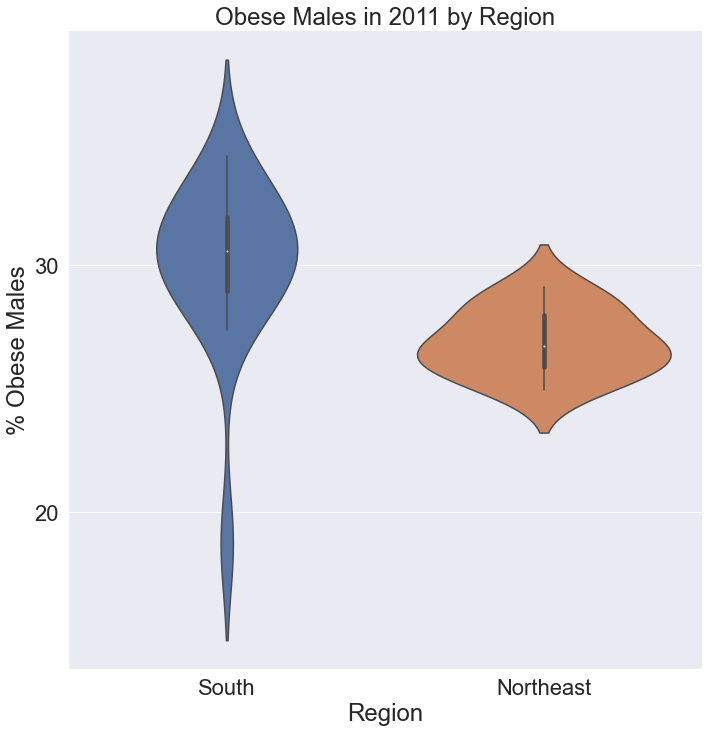

In [285]:
#categorical summary plot
#visualizing the data through a violin plot
#Now we can really get a sense of how the obese variable is distributed by region.
#sns.catplot(x="Region",y="Obese_Males_2011",data=datafile_analysis,height=10,kind="violin")
sns.catplot(x="Region",y="Obese_Males_2011",data=datafile_analysis,height=10,kind="violin").set(title='Obese Males in 2011 by Region',ylabel='% Obese Males')
sns.set(font_scale = 20)

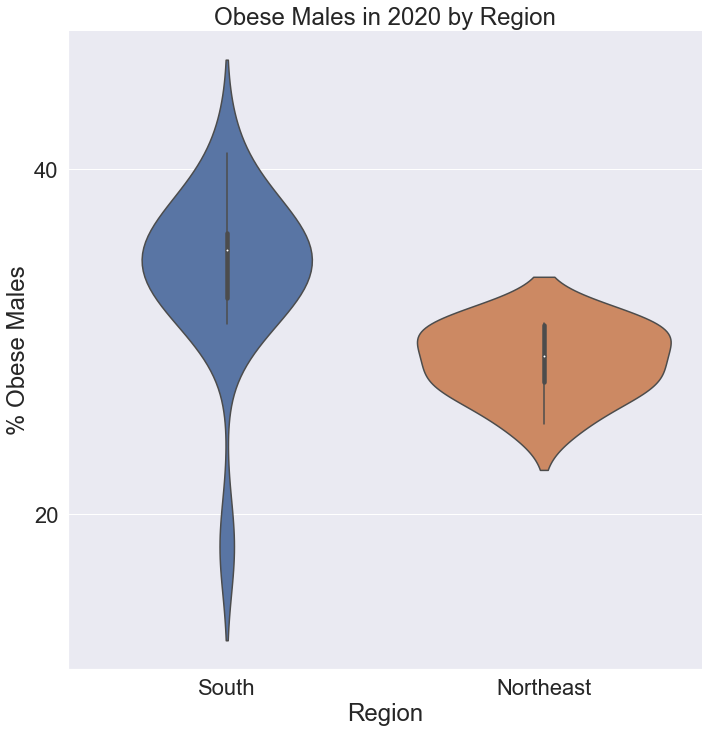

In [288]:
#categorical summary plot
#visualizing the data through a violin plot
#Now we can really get a sense of how the obese variable is distributed by region.
sns.catplot(x="Region",y="Obese_Males_2020",data=datafile_analysis,height=10,kind="violin").set(title='Obese Males in 2020 by Region',ylabel='% Obese Males')
sns.set(font_scale = 20)

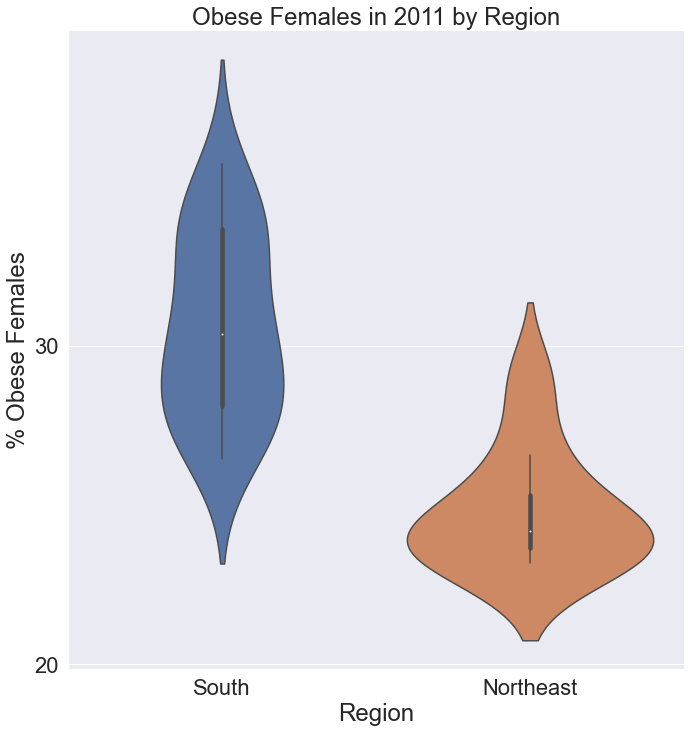

In [291]:
#categorical summary plot
#visualizing the data through a violin plot
#Now we can really get a sense of how the obese variable is distributed by region.
sns.catplot(x="Region",y="Obese_Females_2011",data=datafile_analysis,height=10,kind="violin").set(title='Obese Females in 2011 by Region',ylabel='% Obese Females')
sns.set(font_scale = 20)

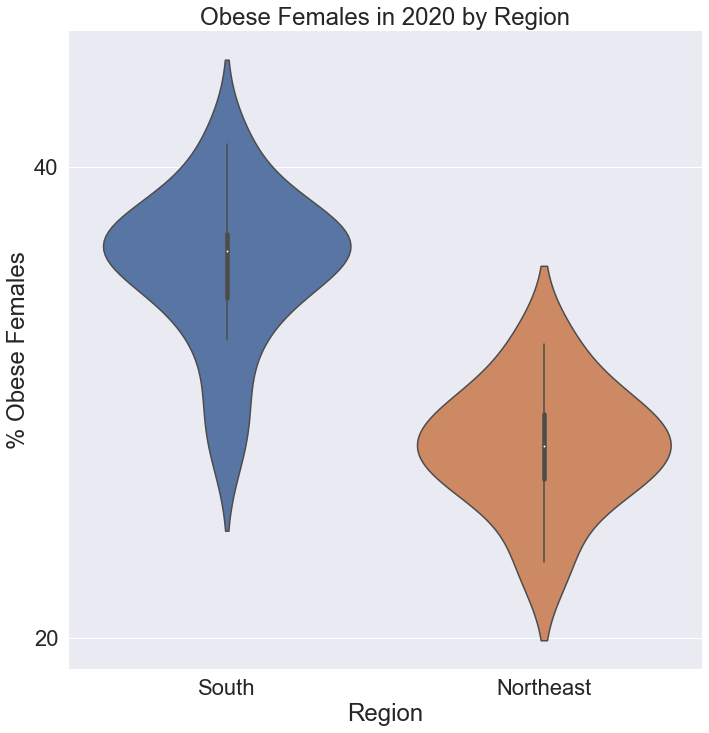

In [294]:
#categorical summary plot
#visualizing the data through a violin plot
#Now we can really get a sense of how the obese variable is distributed by region.
sns.catplot(x="Region",y="Obese_Females_2020",data=datafile_analysis,height=10,kind="violin").set(title='Obese Females in 2020 by Region',ylabel='% Obese Females')
sns.set(font_scale = 20)

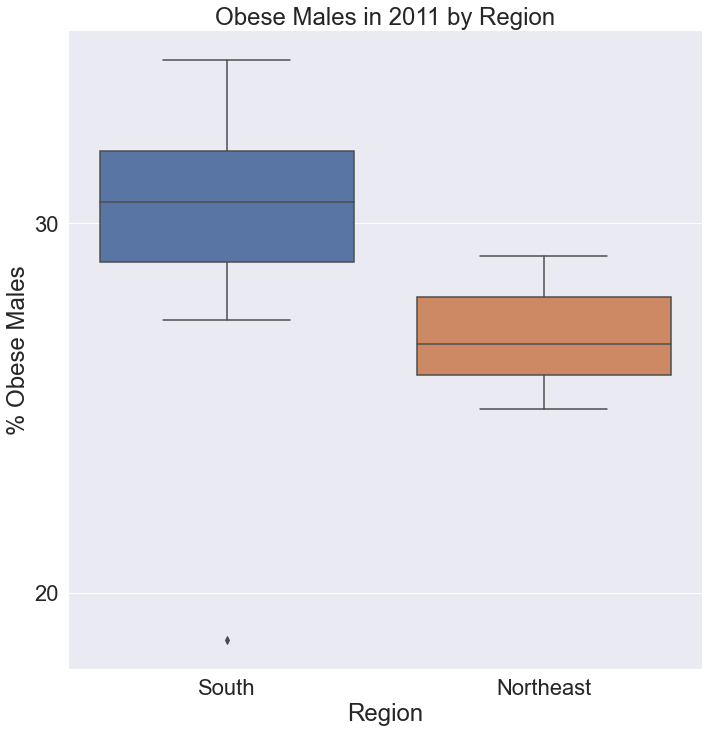

In [299]:
#Categorical summary plot; Box Plot
sns.catplot(x="Region",y="Obese_Males_2011",data=datafile_analysis,height=10,kind="box").set(title='Obese Males in 2011 by Region',ylabel='% Obese Males')
sns.set(font_scale = 20)

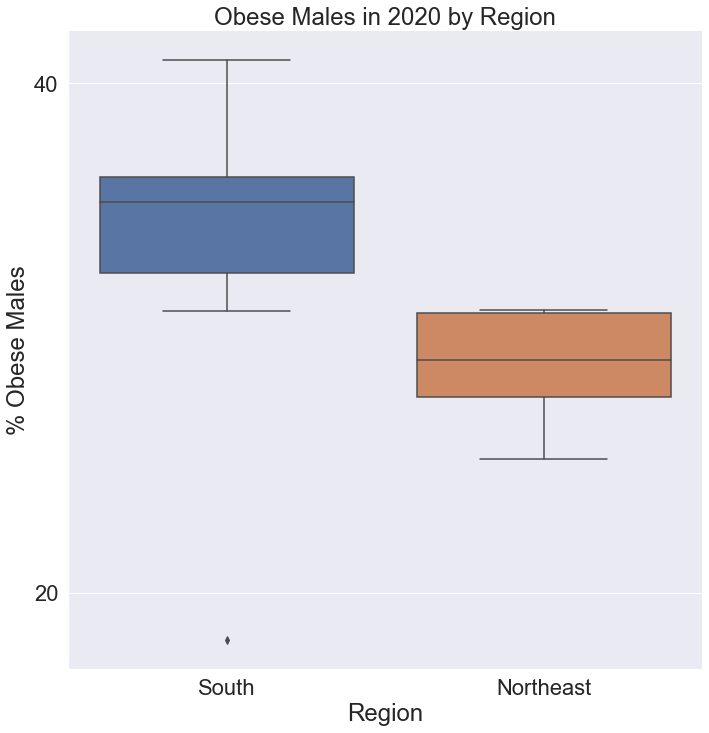

In [301]:
#Categorical summary plot; Box Plot
sns.catplot(x="Region",y="Obese_Males_2020",data=datafile_analysis,height=10,kind="box").set(title='Obese Males in 2020 by Region',ylabel='% Obese Males')
sns.set(font_scale = 20)

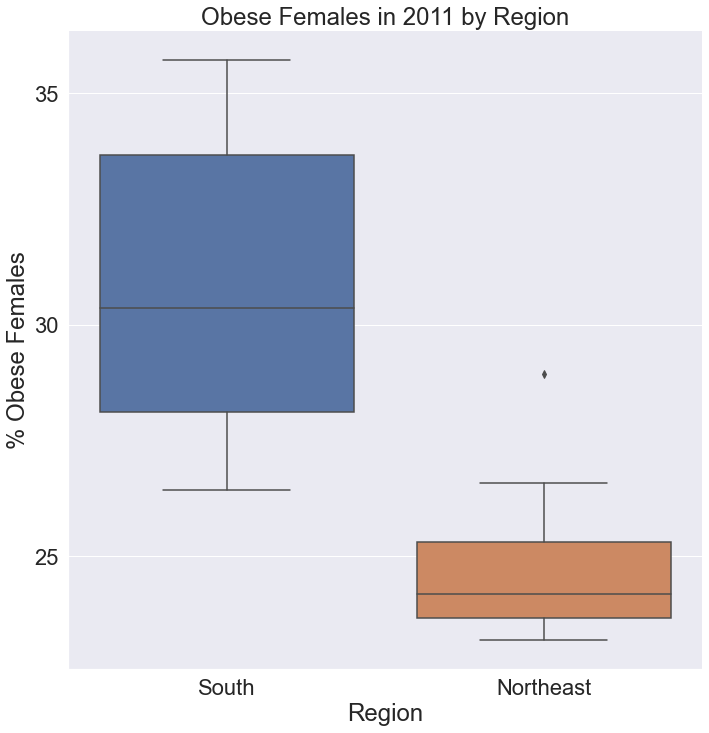

In [303]:
#Categorical summary plot; Box Plot
sns.catplot(x="Region",y="Obese_Females_2011",data=datafile_analysis,height=10,kind="box").set(title='Obese Females in 2011 by Region',ylabel='% Obese Females')
sns.set(font_scale = 20)

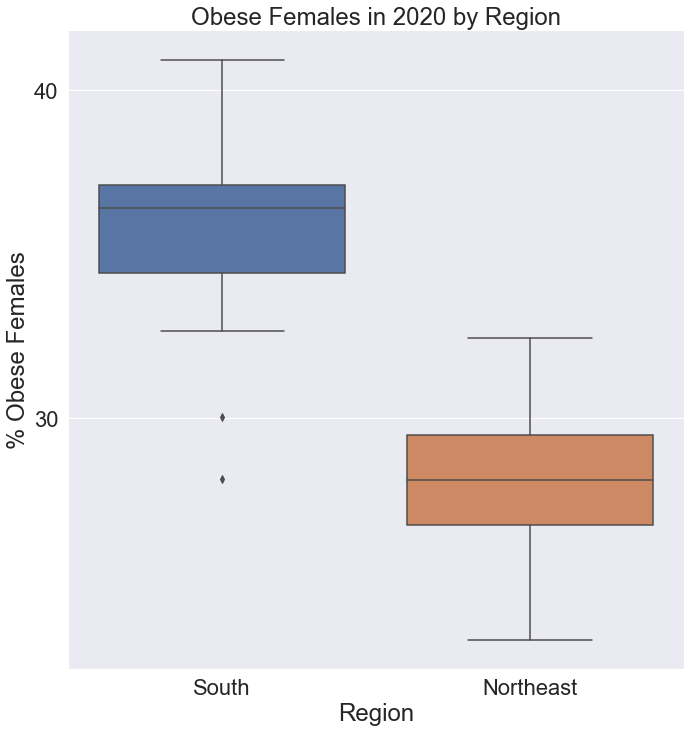

In [305]:
#Categorical summary plot; Box Plot
sns.catplot(x="Region",y="Obese_Females_2020",data=datafile_analysis,height=10,kind="box").set(title='Obese Females in 2020 by Region',ylabel='% Obese Females')
sns.set(font_scale = 20)

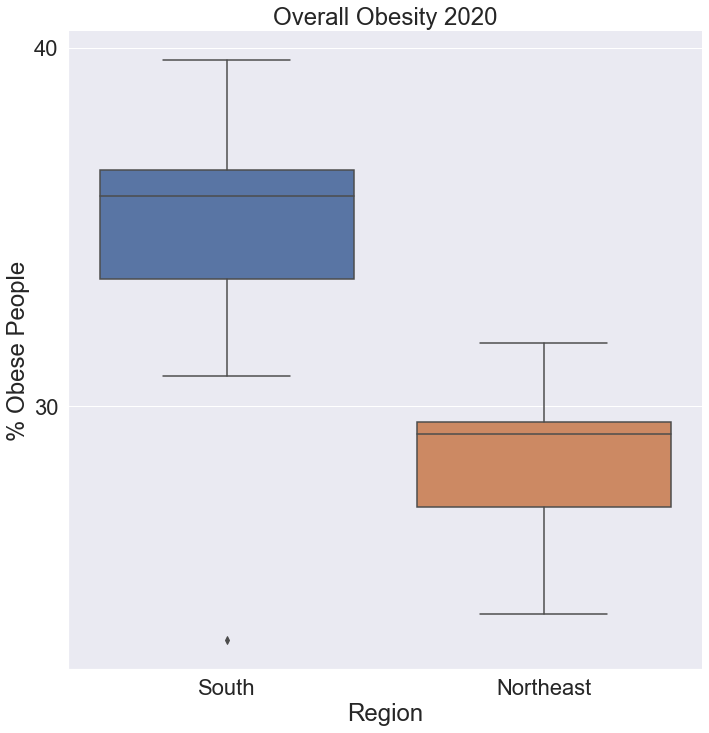

In [313]:
sns.catplot(x="Region",y="Obese_Overall_2020",data=datafile_analysis,height=10,kind="box").set(title='Overall Obesity 2020',ylabel='% Obese People')
sns.set(font_scale = 20)

In [40]:
import pandas as pd
from matplotlib import pyplot as plt

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

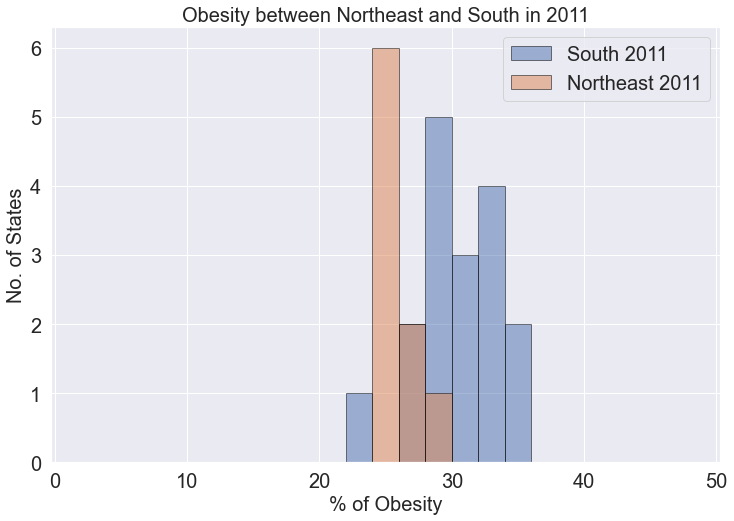

In [27]:
#HYPOTHESIS #4
#South 2011 v Northeast 2011
#Comparing the % of people who are obese in the South in 2011 vs % of people who are obese in the NE in 2011

df = datafile_analysis
df_south = df[(df.Region == "South")]
df_south_2011 = df_south.filter(items=['Obese_Overall_2011'])
df_northeast = df[(df.Region == "Northeast")]
df_northeast_2011 = df_northeast.filter(items=['Obese_Overall_2011'])

bins = list(range(2,50,2))

plt.hist(df_south_2011, edgecolor='black', alpha=0.5, label='South 2011',bins=bins)
plt.hist(df_northeast_2011, edgecolor='black', alpha=0.5, label='Northeast 2011',bins=bins)

plt.legend(loc = 'upper right',fontsize=20)
plt.title('Obesity between Northeast and South in 2011',size=20)
plt.xlabel('% of Obesity', size = 20)
plt.ylabel('No. of States', size = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

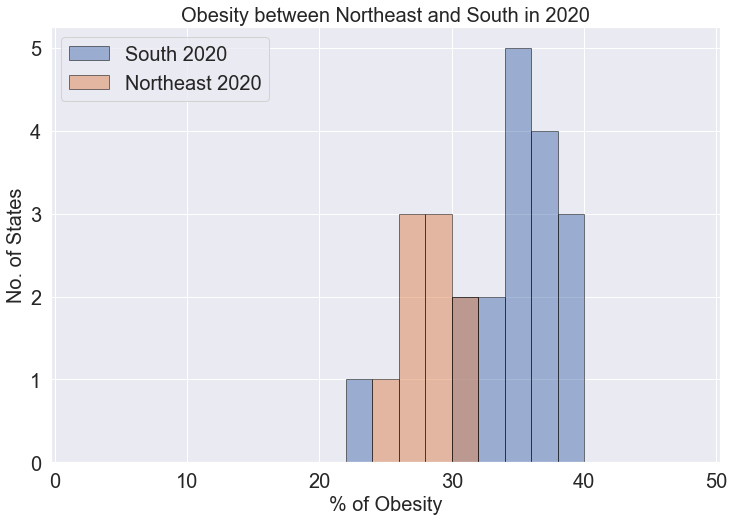

In [29]:
#HYPOTHESIS #5
#South 2020 v Northeast 2020
#Comparing the % of people who are obese in the South in 2020 vs % of people who are obese in the NE in 2020

df = datafile_analysis
df_south = df[(df.Region == "South")]
df_south_2020 = df_south.filter(items=['Obese_Overall_2020'])
df_northeast = df[(df.Region == "Northeast")]
df_northeast_2020 = df_northeast.filter(items=['Obese_Overall_2020'])

bins = list(range(2,50,2))

plt.hist(df_south_2020, edgecolor='black', alpha=0.5, label='South 2020',bins=bins)
plt.hist(df_northeast_2020, edgecolor='black', alpha=0.5, label='Northeast 2020',bins=bins)

plt.legend(loc = 'upper left',fontsize=20)
plt.title('Obesity between Northeast and South in 2020',size=20)
plt.xlabel('% of Obesity', size = 20)
plt.ylabel('No. of States', size = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

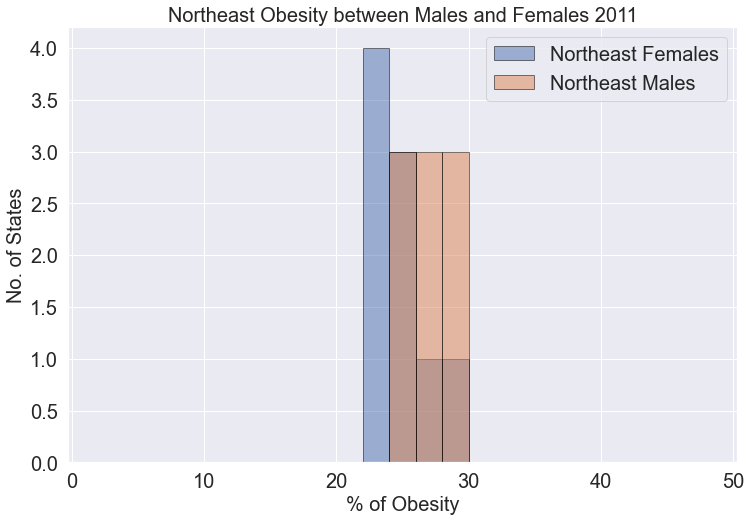

In [30]:
#HYPOTHESIS #6
#Male V Female 2011 obese NE
#Comparing the % of males who are obese vs % of females who are obese in the northeast 2011

df = datafile_analysis
df_northeast = df[(df.Region == "Northeast")]
df_northeast_obese_f_2011 = df_northeast.filter(items=['Obese_Females_2011'])
df_northeast_obese_m_2011 = df_northeast.filter(items=['Obese_Males_2011'])


#overall_obesity = df['Obese_Overall_2011']

bins = list(range(2,50,2))

plt.hist(df_northeast_obese_f_2011, edgecolor='black', alpha=0.5, label='Northeast Females',bins=bins)
plt.hist(df_northeast_obese_m_2011, edgecolor='black', alpha=0.5, label='Northeast Males',bins=bins)



plt.legend(loc = 'upper right',fontsize=20)
plt.title('Northeast Obesity between Males and Females 2011', size=20)
plt.xlabel('% of Obesity', size = 20)
plt.ylabel('No. of States', size = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

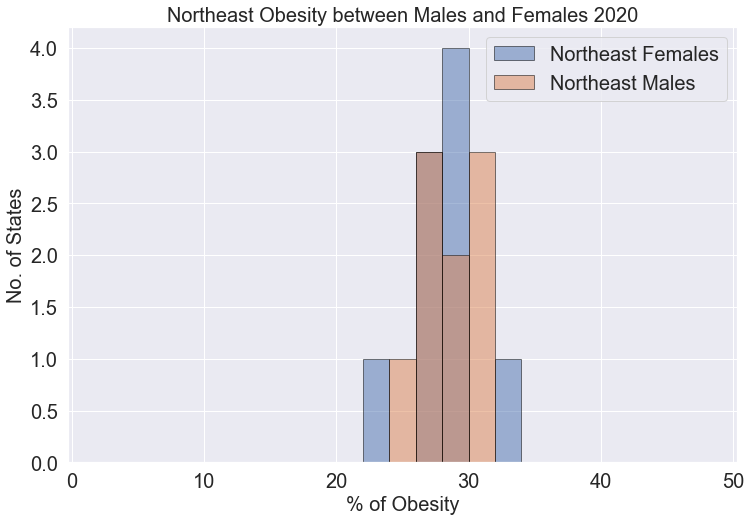

In [31]:
#HYPOTHESIS #7
#Male V Female 2020 obese NE
#Comparing the % of males who are obese vs % of females who are obese in the northeast 2020

df = datafile_analysis
df_northeast = df[(df.Region == "Northeast")]
df_northeast_obese_f_2020 = df_northeast.filter(items=['Obese_Females_2020'])
df_northeast_obese_m_2020 = df_northeast.filter(items=['Obese_Males_2020'])


overall_obesity = df['Obese_Overall_2020']

bins = list(range(2,50,2))

plt.hist(df_northeast_obese_f_2020, edgecolor='black', alpha=0.5, label='Northeast Females',bins=bins)
plt.hist(df_northeast_obese_m_2020, edgecolor='black', alpha=0.5, label='Northeast Males',bins=bins)



plt.legend(loc = 'upper right',fontsize=20)
plt.title('Northeast Obesity between Males and Females 2020',size=20)
plt.xlabel('% of Obesity', size = 20)
plt.ylabel('No. of States', size = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

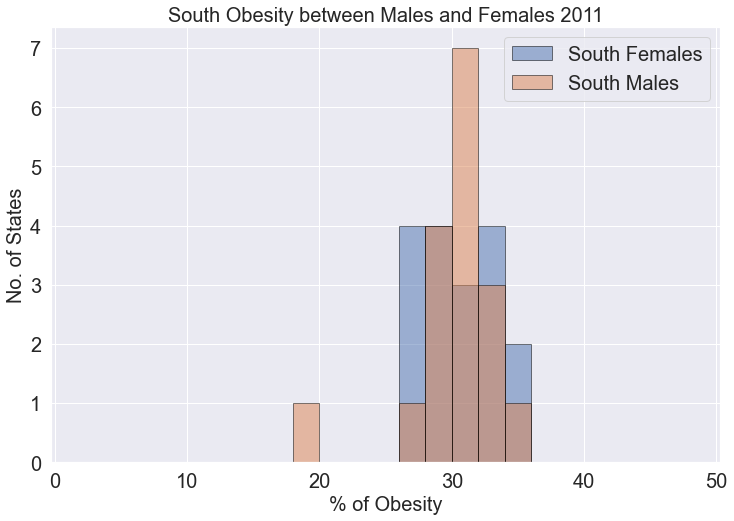

In [33]:
#HYPOTHESIS 8
#Comparing the % of males who are obese vs % of females who are obese in the south 2011

df = datafile_analysis
df_south = df[(df.Region == "South")]
df_south_obese_f_2011 = df_south.filter(items=['Obese_Females_2011'])
df_south_obese_m_2011 = df_south.filter(items=['Obese_Males_2011'])


overall_obesity = df['Obese_Overall_2011']

bins = list(range(2,50,2))

plt.hist(df_south_obese_f_2011, edgecolor='black', alpha=0.5, label='South Females',bins=bins)
plt.hist(df_south_obese_m_2011, edgecolor='black', alpha=0.5, label='South Males',bins=bins)



plt.legend(loc = 'upper right',fontsize=20)
plt.title('South Obesity between Males and Females 2011',size=20)
plt.xlabel('% of Obesity', size = 20)
plt.ylabel('No. of States', size = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

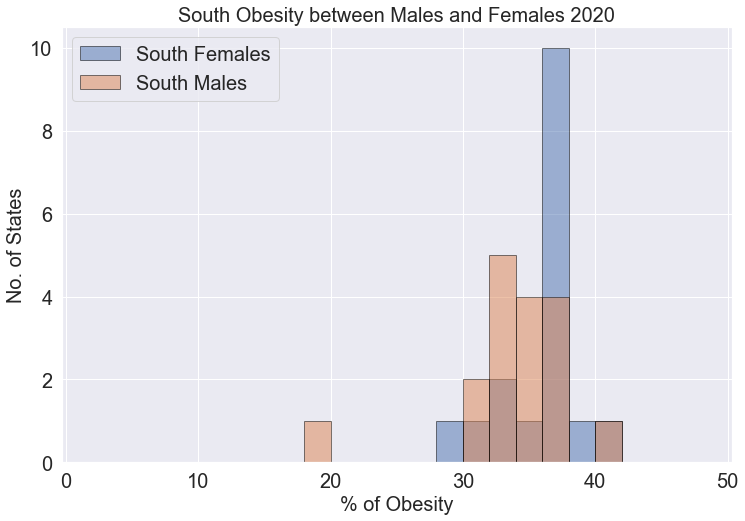

In [36]:
#HYPOTHESIS #9
#Comparing the % of males who are obese vs % of females who are obese in the south 2020

df = datafile_analysis
df_south = df[(df.Region == "South")]
df_south_obese_f_2020 = df_south.filter(items=['Obese_Females_2020'])
df_south_obese_m_2020 = df_south.filter(items=['Obese_Males_2020'])


overall_obesity = df['Obese_Overall_2020']

bins = list(range(2,50,2))

plt.hist(df_south_obese_f_2020, edgecolor='black', alpha=0.5, label='South Females',bins=bins)
plt.hist(df_south_obese_m_2020, edgecolor='black', alpha=0.5, label='South Males',bins=bins)



plt.legend(loc = 'upper left',fontsize=20)
plt.title('South Obesity between Males and Females 2020',size=20)
plt.xlabel('% of Obesity', size = 20)
plt.ylabel('No. of States', size = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

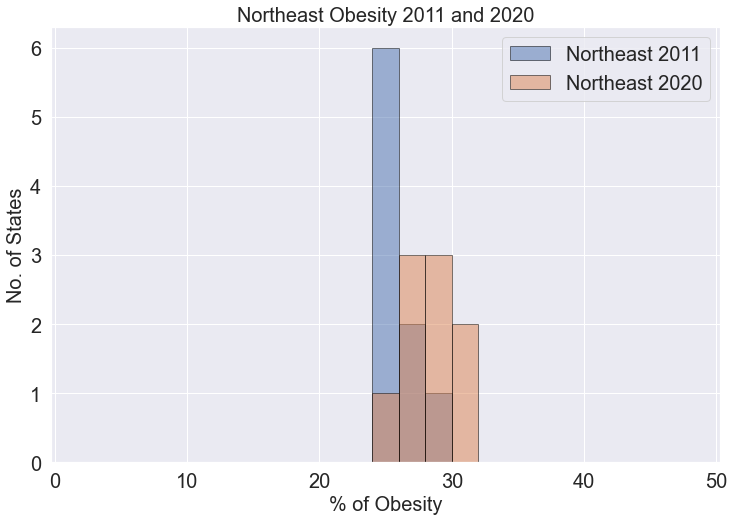

In [37]:
#HYPOTHESIS #2
#Obese NE 2011 V NE 2020
#Comparing the % of obese people in the northeast 2011 vs % of obese people in the northeast 2020
df = datafile_analysis
df_northeast = df[(df.Region == "Northeast")]
df_northeast_obese_2011 = df_northeast.filter(items=['Obese_Overall_2011'])
df_northeast_obese_2020 = df_northeast.filter(items=['Obese_Overall_2020'])

bins = list(range(2,50,2))

plt.hist(df_northeast_obese_2011, edgecolor='black', alpha=0.5, label='Northeast 2011',bins=bins)
plt.hist(df_northeast_obese_2020, edgecolor='black', alpha=0.5, label='Northeast 2020',bins=bins)



plt.legend(loc = 'upper right',fontsize=20)
plt.title('Northeast Obesity 2011 and 2020', size=20)
plt.xlabel('% of Obesity', size = 20)
plt.ylabel('No. of States', size = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

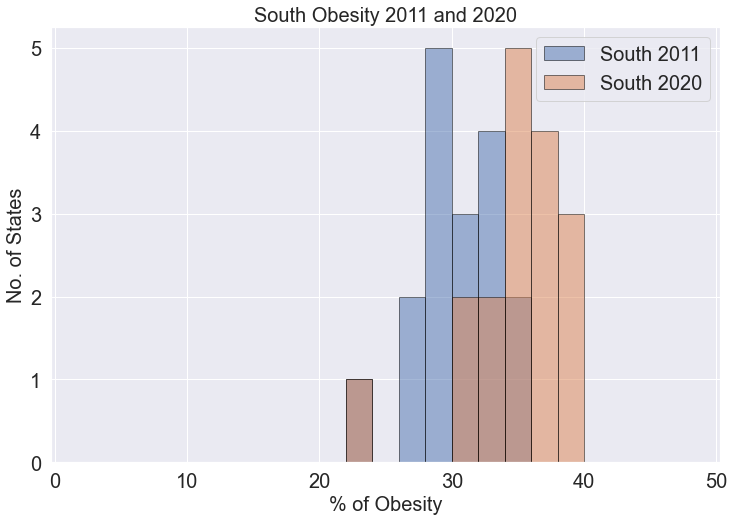

In [38]:
#HYPOTHESIS #3
#Obese south 2011 V south 2020
#Comparing the % of obese people in the south 2011 vs % of obese people in the south 2020
df = datafile_analysis
df_northeast = df[(df.Region == "Northeast")]
df_south_obese_2011 = df_south.filter(items=['Obese_Overall_2011'])
df_south_obese_2020 = df_south.filter(items=['Obese_Overall_2020'])

bins = list(range(2,50,2))

plt.hist(df_south_obese_2011, edgecolor='black', alpha=0.5, label='South 2011',bins=bins)
plt.hist(df_south_obese_2020, edgecolor='black', alpha=0.5, label='South 2020',bins=bins)





plt.legend(loc = 'upper right',fontsize=20)
plt.title('South Obesity 2011 and 2020',size=20)
plt.xlabel('% of Obesity', size = 20)
plt.ylabel('No. of States', size = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

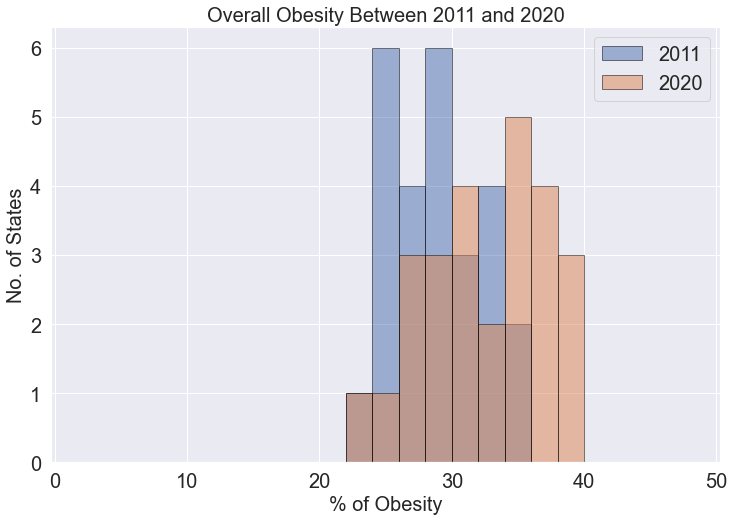

In [39]:
#HYPOTHESIS #1
#Obese Overall
#Comparing the % of obese people in 2011 vs % of obese people in  2020
df = datafile_analysis
overall_obesity_2011 = df['Obese_Overall_2011']
overall_obesity_2020 = df['Obese_Overall_2020']

bins = list(range(2,50,2))

plt.hist(overall_obesity_2011, edgecolor='black', alpha=0.5, label='2011',bins=bins)
plt.hist(overall_obesity_2020, edgecolor='black', alpha=0.5, label='2020',bins=bins)




plt.legend(loc = 'upper right',fontsize=20)
plt.title('Overall Obesity Between 2011 and 2020',size=20)
plt.xlabel('% of Obesity', size = 20)
plt.ylabel('No. of States', size = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

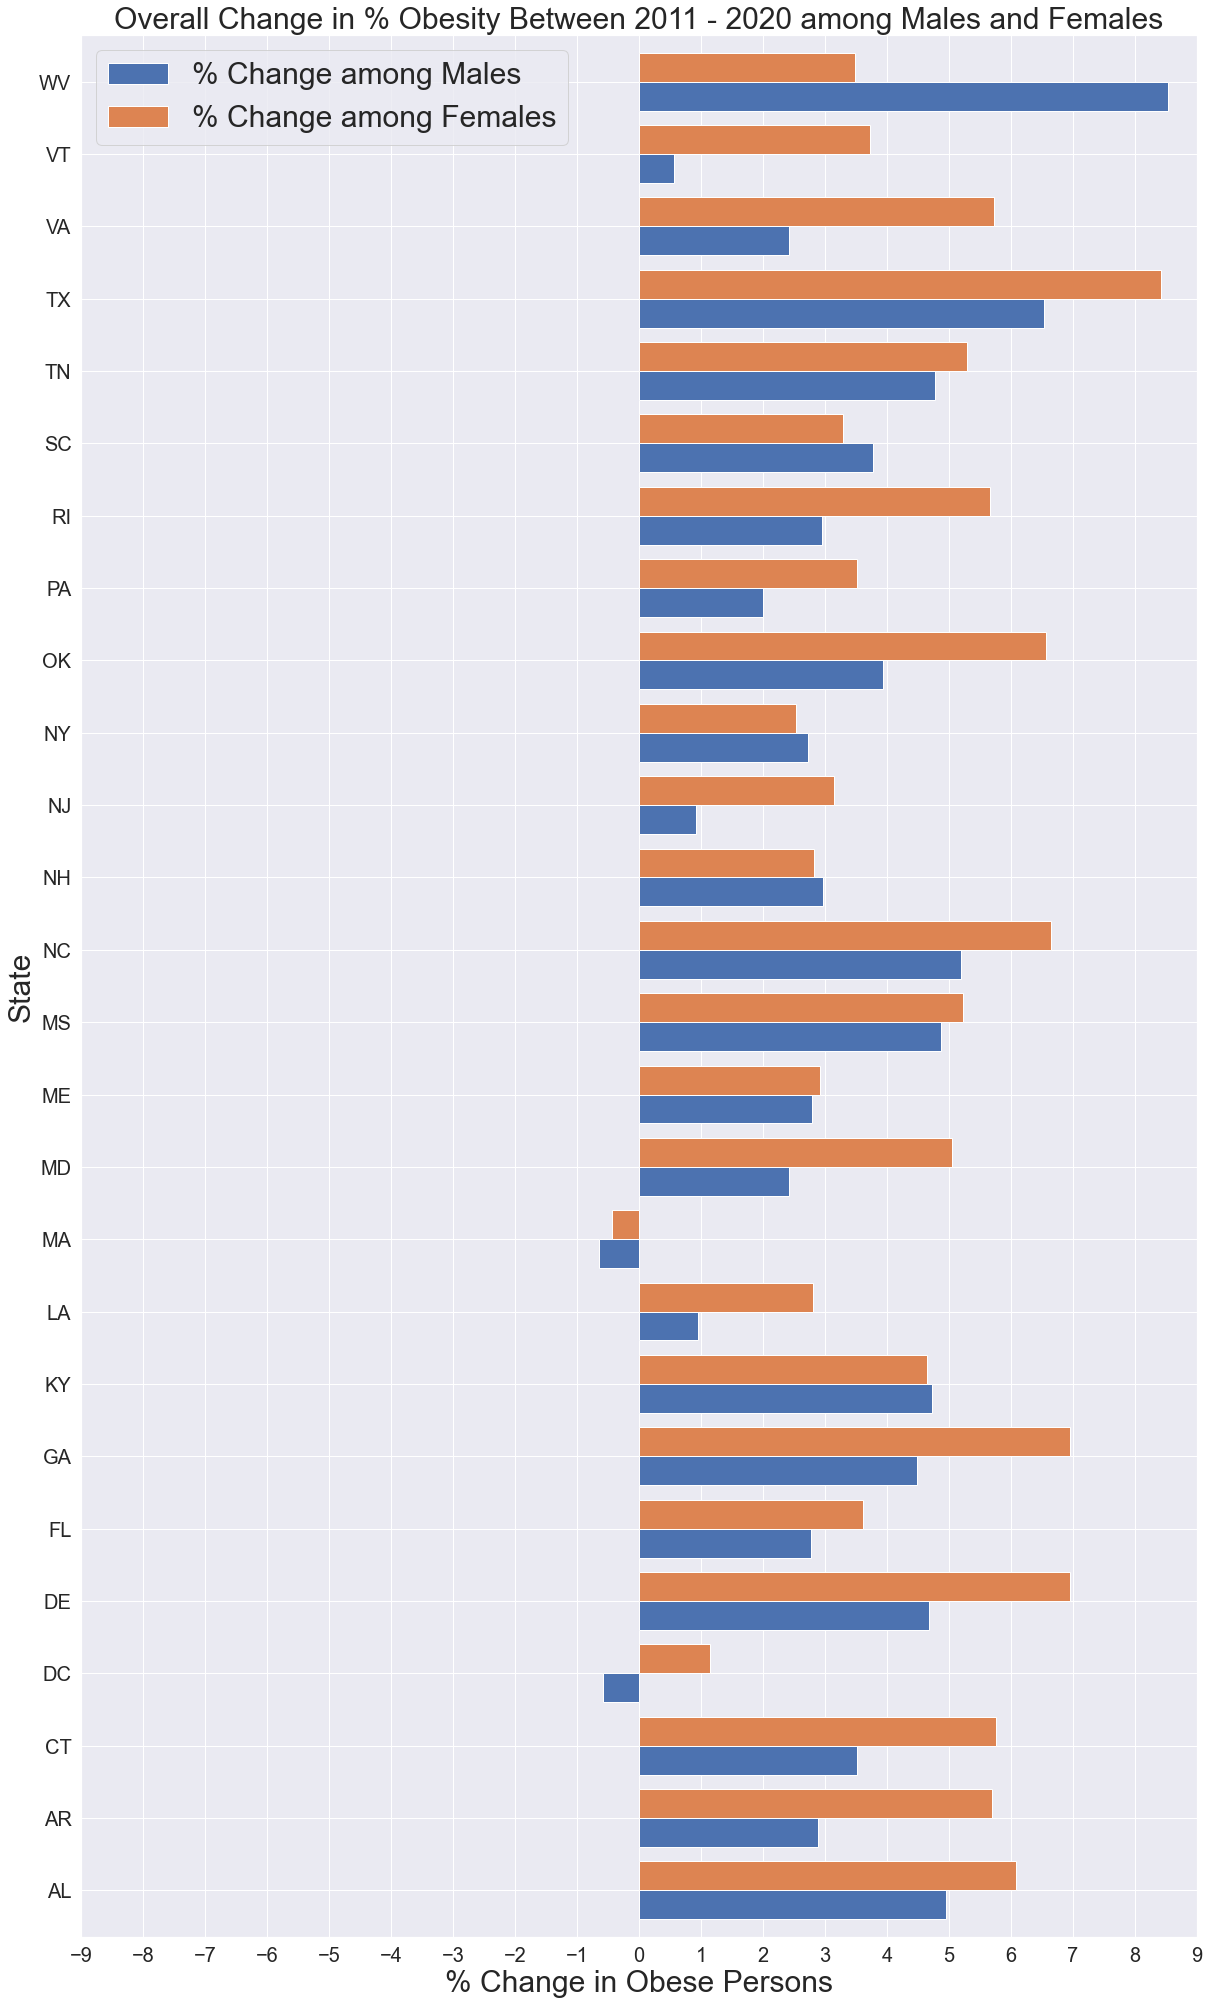

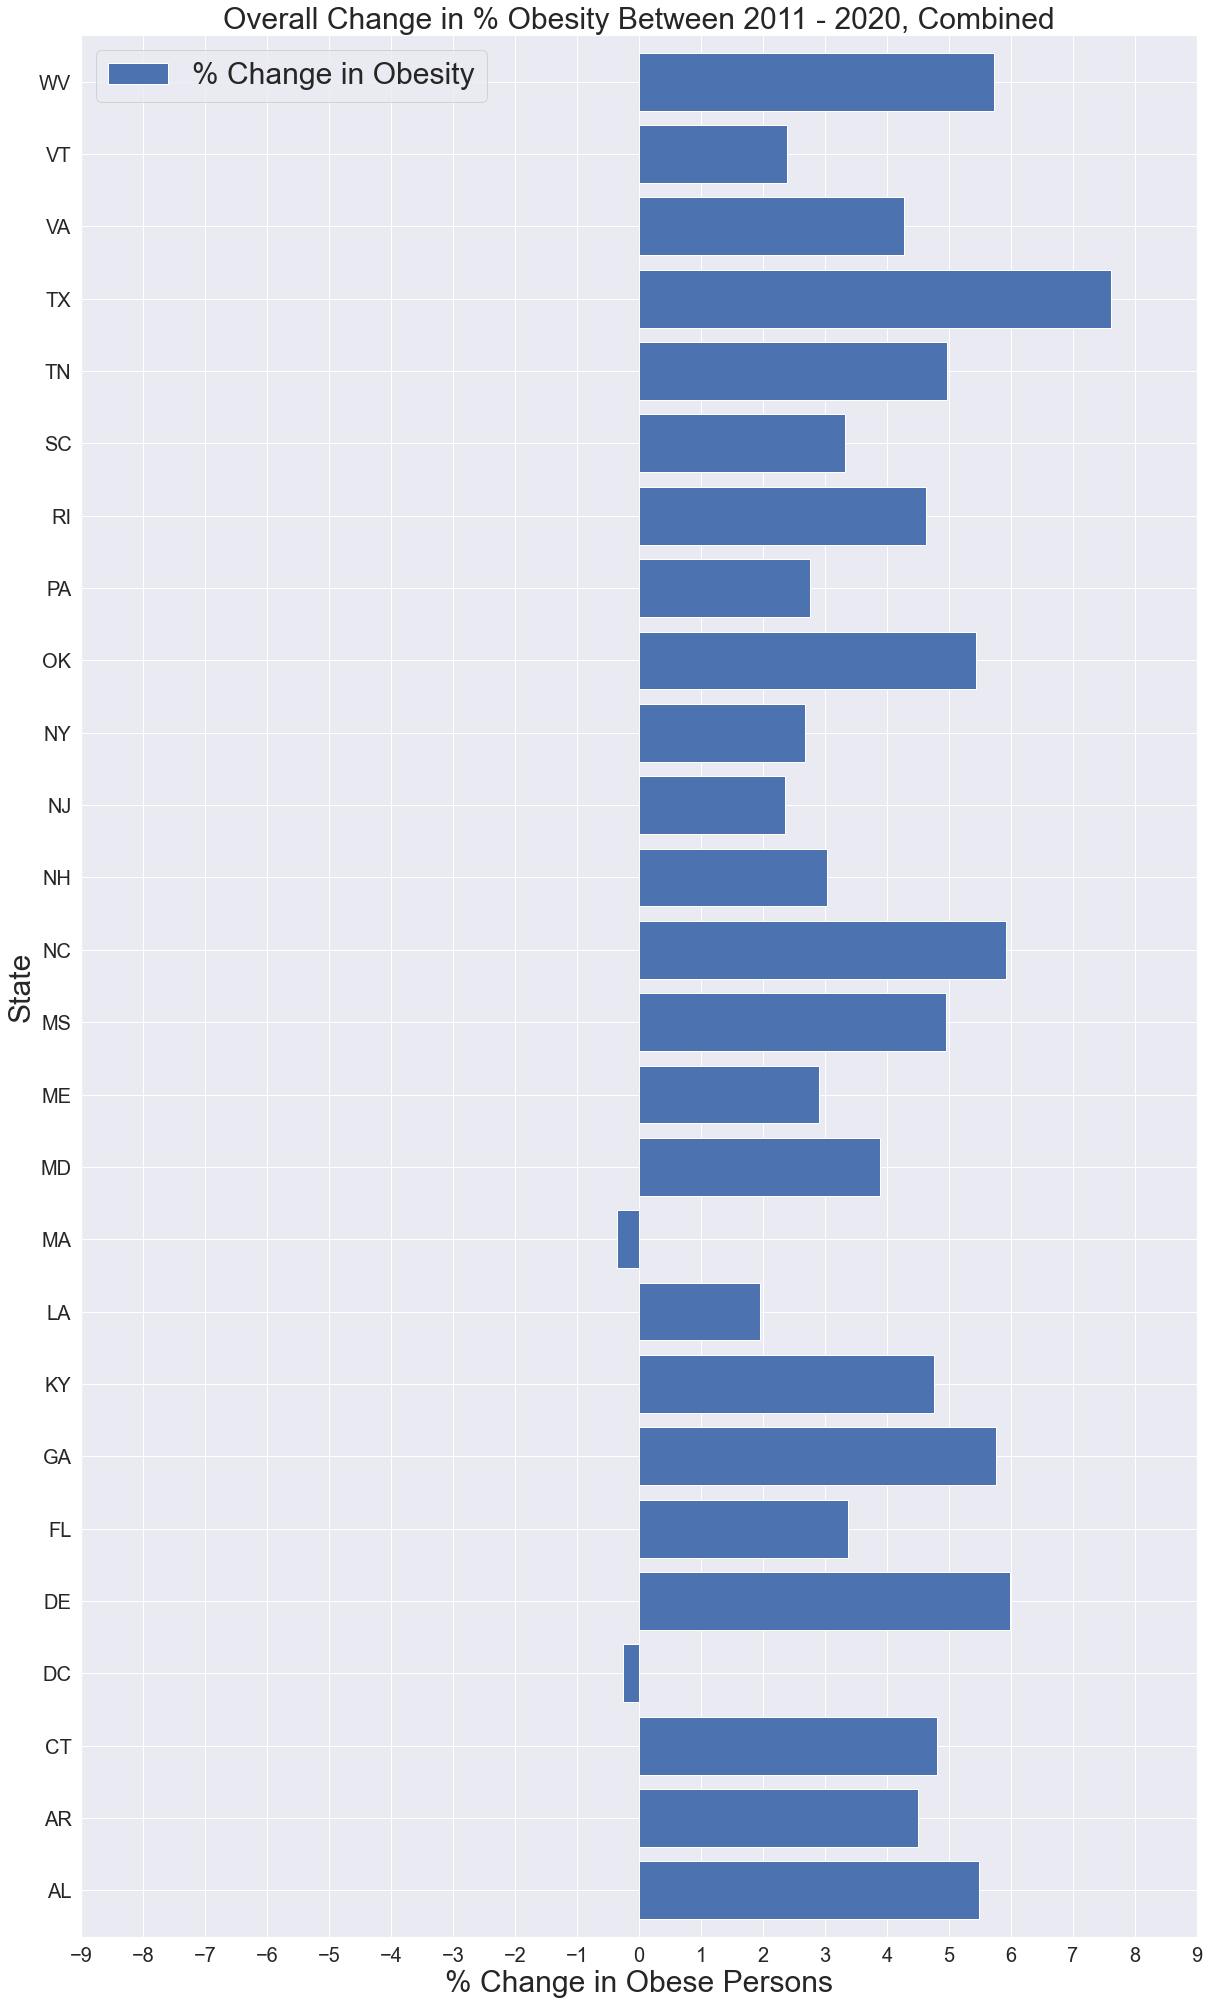

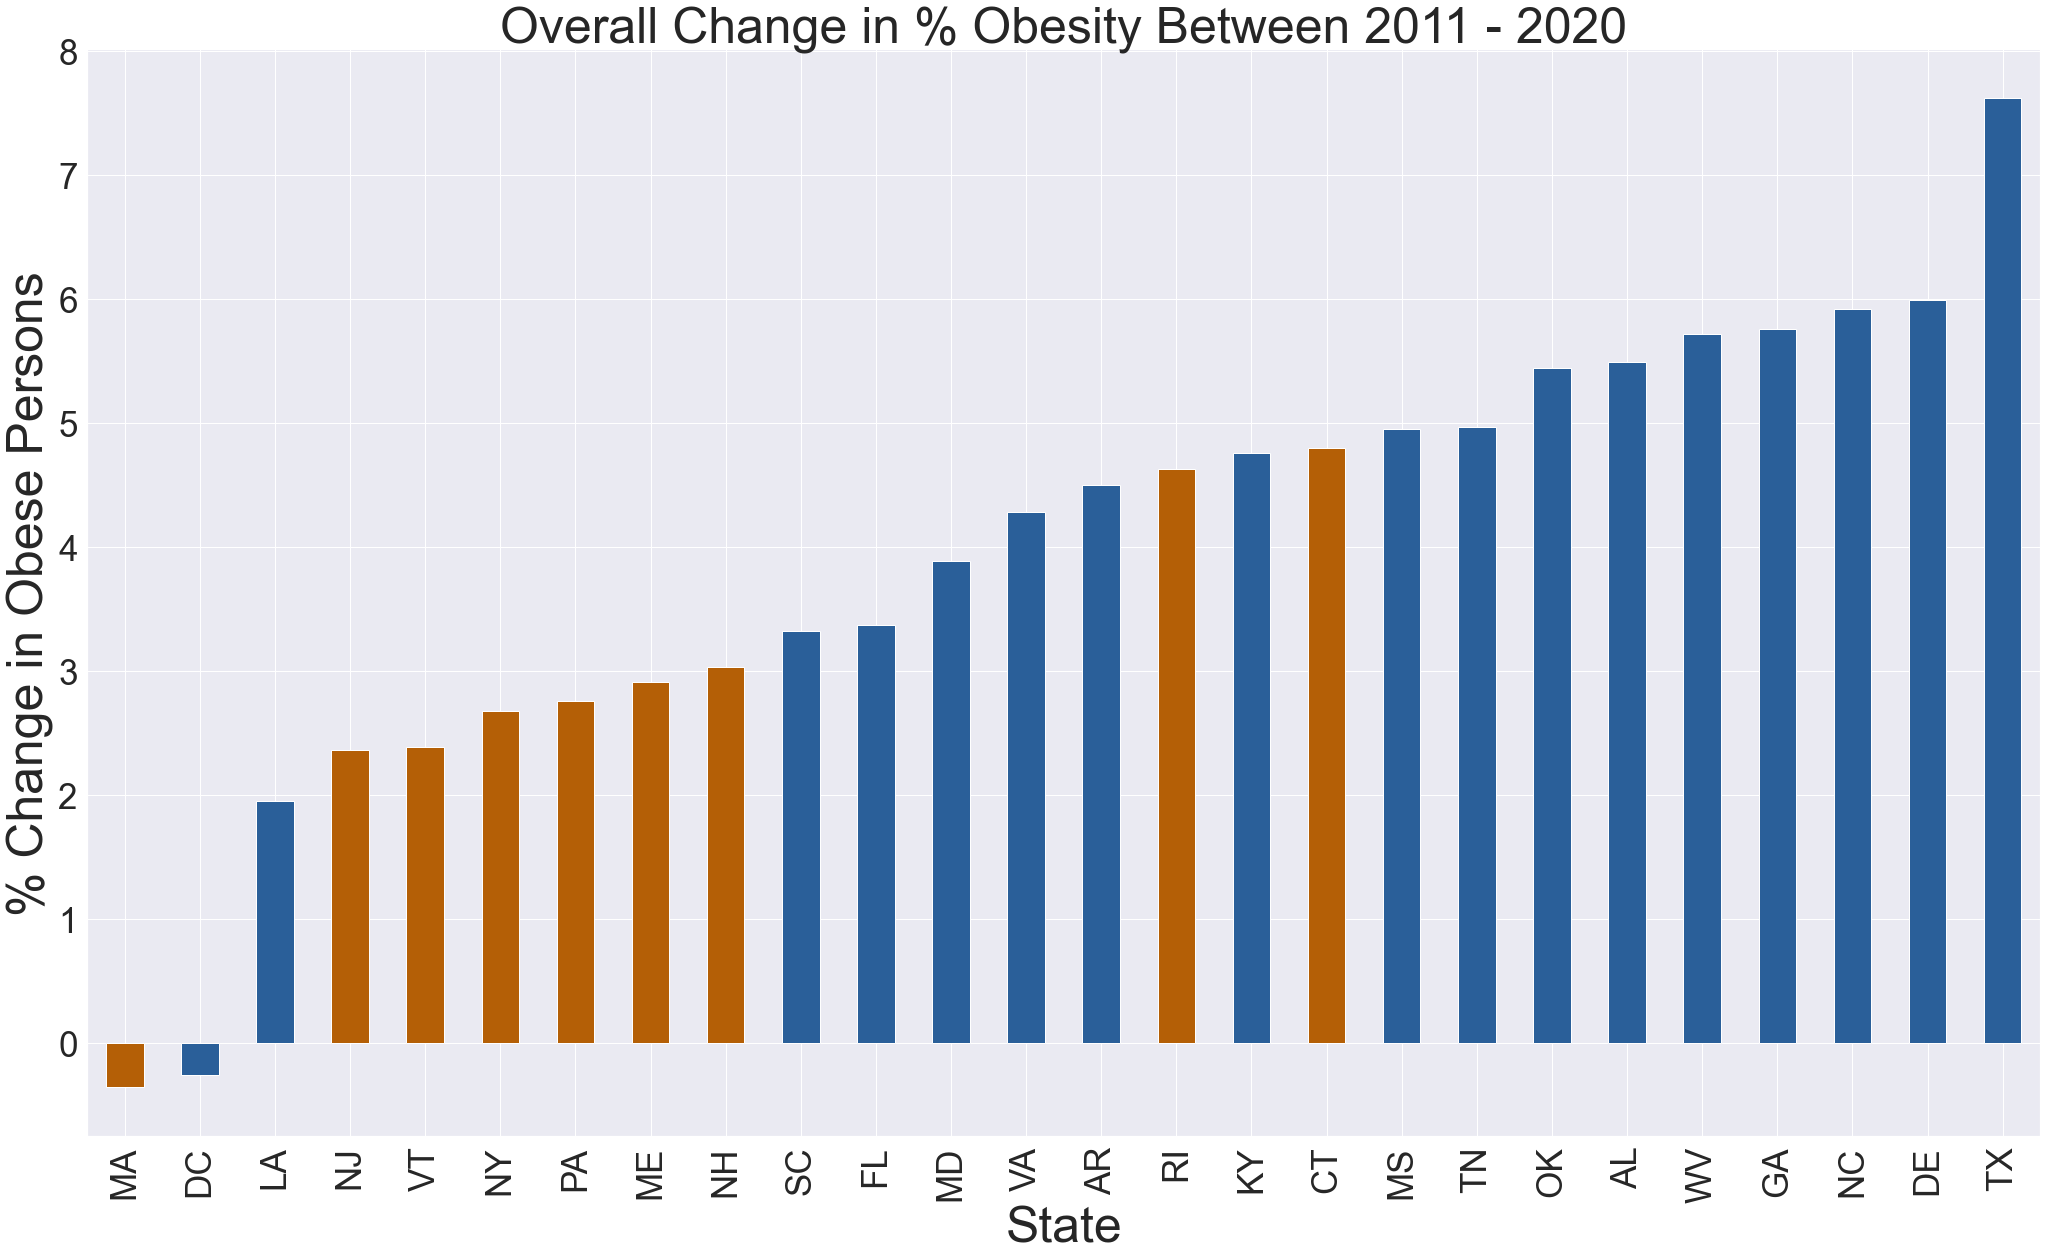

<AxesSubplot:ylabel='Locationabbr'>

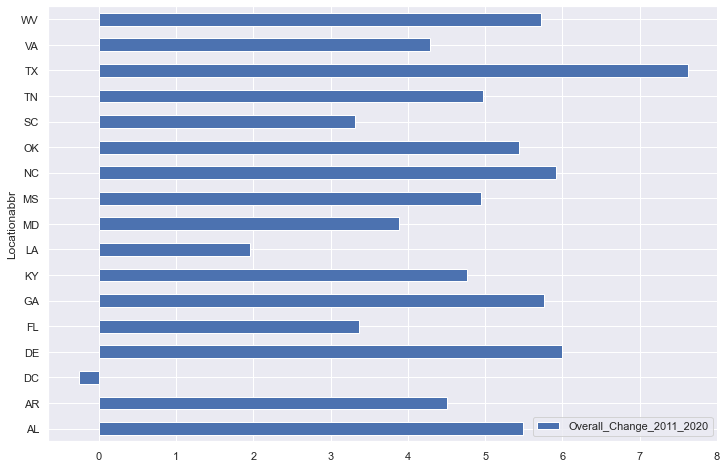

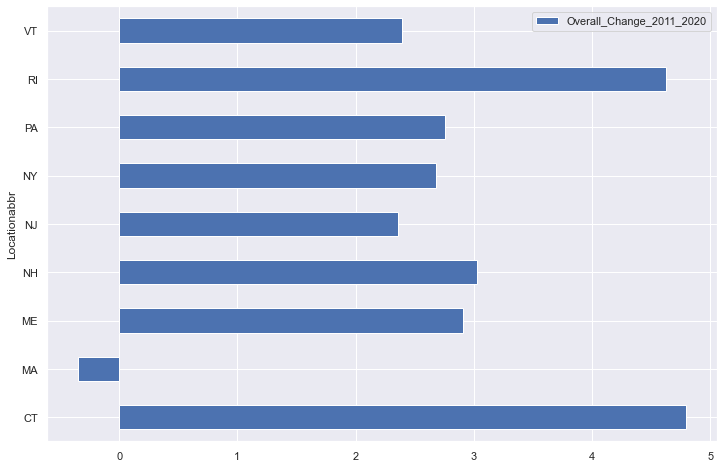

In [173]:
#THIS IS WHERE WE COMPARE THE CHANGES IN OBESITY BETWEEN YEARS

df = datafile_analysis
df = pd.DataFrame(df)

location = df['Locationabbr']


#####filtering out the northeast comparison of change#####

df_northeast = df[(df.Region == "Northeast")]
df_northeast_overall_change = df_northeast.filter(items=['Overall_Change_2011_2020'])
df_northeast_males_change = df_northeast.filter(items=['Males_Change_2011_2020'])
df_northeast_females_change = df_northeast.filter(items=['Females_Change_2011_2020'])


#####filtering out the south comparison of change#####

df_south = df[(df.Region == "South")]
df_south_overall_change = df_south.filter(items=['Overall_Change_2011_2020'])
df_south_males_change = df_south.filter(items=['Males_Change_2011_2020'])
df_south_females_change = df_south.filter(items=['Females_Change_2011_2020'])

#####filtering out both regions comparison of change#####

df_both_overall_change = df['Overall_Change_2011_2020']
df_both_males_change = df['Males_Change_2011_2020']
df_both_females_change = df['Females_Change_2011_2020']


#####plotting overall change across all states among males and females#####

df = datafile_analysis
df = pd.DataFrame(df,columns=['Locationabbr','Males_Change_2011_2020','Females_Change_2011_2020'])
df.plot.barh('Locationabbr',['Males_Change_2011_2020','Females_Change_2011_2020'],figsize=(20,35),xticks=range(-9,10,1),width=0.8)

plt.title('Overall Change in % Obesity Between 2011 - 2020 among Males and Females', size=30)
plt.ylabel('State',size=30)
plt.xlabel('% Change in Obese Persons',size=30)
plt.legend(['% Change among Males','% Change among Females'],loc="best",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

#####plotting overall change across all states#####

df = datafile_analysis
df = pd.DataFrame(df,columns=['Locationabbr','Region','Overall_Change_2011_2020'])
df.plot.barh('Locationabbr','Overall_Change_2011_2020',figsize=(20,35),xticks=range(-9,10,1),width=0.8)

plt.title('Overall Change in % Obesity Between 2011 - 2020, Combined', size=30)
plt.ylabel('State',size=30)
plt.xlabel('% Change in Obese Persons',size=30)
plt.legend(['% Change in Obesity'],loc="best",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

#####plotting a waterfall chart#####
df_waterfall = df.sort_values(by='Overall_Change_2011_2020')
#print(df_waterfall)

#creating a new column to color code the values by region
ne_states = ["ME","NH","VT","MA","RI","CT","NY","NJ","PA"]

def is_ne(Locationabbr):
    return '#b45f06' if Locationabbr in ne_states else '#2A5F99' #'#b45f06' is the dark orange, '#2a5f99' is the blue

df_waterfall['Color'] = df_waterfall['Locationabbr'].apply(is_ne)

#defining that new feature as a list so we can plot accordingly
hue = list(df_waterfall.Color)

#plotting the waterfall chart
df_waterfall.plot.bar('Locationabbr','Overall_Change_2011_2020',color=hue,figsize=(35,20))

plt.title('Overall Change in % Obesity Between 2011 - 2020', size = 50)
plt.ylabel('% Change in Obese Persons', size=50)
plt.xlabel('State',size=50)
plt.legend().remove()
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.show()

#####plotting overall change split by region#####

df = datafile_analysis
df = pd.DataFrame(df,columns=['Locationabbr','Region','Overall_Change_2011_2020'])
df_northeast = df[(df.Region == "Northeast")]
df_south = df[(df.Region == "South")]
#print(df_south)
df_south.plot.barh('Locationabbr','Overall_Change_2011_2020')
df_northeast.plot.barh('Locationabbr','Overall_Change_2011_2020')